In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
application = pd.read_csv('application_data.csv')
application.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
cols = application.iloc[:,41:91].columns

In [4]:
# columns from 41,90 are having more than 50 percent of null values. so dropping the columns

In [5]:
application.drop(cols ,axis=1,  inplace=True)

In [6]:
application.isna().sum()[31:]

REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NOT_LIVE_CITY             0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DAYS_LAST_PHONE_CHANGE             1
FLAG_DOCUMENT_2                    0
FLAG_DOCUMENT_3                    0
FLAG_DOCUMENT_4                    0
FLAG_DOCUMENT_5                    0
FLAG_DOCUMENT_6                    0
FLAG_DOCUMENT_7                    0
FLAG_DOCUMENT_8                    0
FLAG_DOCUMENT_9                    0
FLAG_DOCUMENT_10                   0
FLAG_DOCUMENT_11                   0
FLAG_DOCUMENT_12                   0
FLAG_DOCUMENT_13                   0
F

In [7]:
# Replacing the null values in the ratio of existing distribution
application['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [8]:
occupation_distribution = application['OCCUPATION_TYPE'].value_counts(normalize=True)
occupation_distribution

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [9]:
non_null_values = occupation_distribution.index.tolist()
non_null_values

['Laborers',
 'Sales staff',
 'Core staff',
 'Managers',
 'Drivers',
 'High skill tech staff',
 'Accountants',
 'Medicine staff',
 'Security staff',
 'Cooking staff',
 'Cleaning staff',
 'Private service staff',
 'Low-skill Laborers',
 'Waiters/barmen staff',
 'Secretaries',
 'Realty agents',
 'HR staff',
 'IT staff']

In [10]:
null_indices = application['OCCUPATION_TYPE'].isnull()
print(null_indices)
num_null_values = null_indices.sum()
num_null_values

0         False
1         False
2         False
3         False
4         False
          ...  
307506    False
307507     True
307508    False
307509    False
307510    False
Name: OCCUPATION_TYPE, Length: 307511, dtype: bool


96391

In [11]:
replacement_values = np.random.choice(non_null_values, size=num_null_values, p=occupation_distribution.values)
replacement_values

array(['Managers', 'Laborers', 'Sales staff', ..., 'Core staff',
       'High skill tech staff', 'Managers'], dtype='<U21')

In [12]:
application.loc[null_indices, 'OCCUPATION_TYPE'] = replacement_values

In [13]:
application['OCCUPATION_TYPE'].isna().sum()

0

In [14]:
application['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [15]:
distribution = application['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)
non_null_values = distribution.index.tolist()
null_indices = application['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull()
num_null_values = null_indices.sum()
replacement_values = np.random.choice(non_null_values, size=num_null_values, p=distribution.values)
application.loc[null_indices, 'AMT_REQ_CREDIT_BUREAU_HOUR'] = replacement_values

In [16]:
application['AMT_REQ_CREDIT_BUREAU_HOUR'].isna().sum()

0

In [17]:
application['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [18]:
distribution = application['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)
non_null_values = distribution.index.tolist()
null_indices = application['AMT_REQ_CREDIT_BUREAU_DAY'].isnull()
num_null_values = null_indices.sum()
replacement_values = np.random.choice(non_null_values, size=num_null_values, p=distribution.values)
application.loc[null_indices, 'AMT_REQ_CREDIT_BUREAU_DAY'] = replacement_values

In [19]:
application['AMT_REQ_CREDIT_BUREAU_DAY'].isna().sum()

0

In [20]:
application['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [21]:
distribution = application['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)
non_null_values = distribution.index.tolist()
null_indices = application['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull()
num_null_values = null_indices.sum()
replacement_values = np.random.choice(non_null_values, size=num_null_values, p=distribution.values)
application.loc[null_indices, 'AMT_REQ_CREDIT_BUREAU_WEEK'] = replacement_values

In [22]:
application['AMT_REQ_CREDIT_BUREAU_WEEK'].isna().sum()

0

In [23]:
application['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()


0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
23.0         1
27.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [24]:
distribution = application['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)
non_null_values = distribution.index.tolist()
null_indices = application['AMT_REQ_CREDIT_BUREAU_MON'].isnull()
num_null_values = null_indices.sum()
replacement_values = np.random.choice(non_null_values, size=num_null_values, p=distribution.values)
application.loc[null_indices, 'AMT_REQ_CREDIT_BUREAU_MON'] = replacement_values

In [25]:
application['AMT_REQ_CREDIT_BUREAU_MON'].isna().sum()

0

In [26]:
application['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()


0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [27]:
distribution = application['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)
non_null_values = distribution.index.tolist()
null_indices = application['AMT_REQ_CREDIT_BUREAU_QRT'].isnull()
num_null_values = null_indices.sum()
replacement_values = np.random.choice(non_null_values, size=num_null_values, p=distribution.values)
application.loc[null_indices, 'AMT_REQ_CREDIT_BUREAU_QRT'] = replacement_values

In [28]:
application['AMT_REQ_CREDIT_BUREAU_QRT'].isna().sum()

0

In [29]:
application['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [30]:
distribution = application['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)
non_null_values = distribution.index.tolist()
null_indices = application['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull()
num_null_values = null_indices.sum()
replacement_values = np.random.choice(non_null_values, size=num_null_values, p=distribution.values)
application.loc[null_indices, 'AMT_REQ_CREDIT_BUREAU_YEAR'] = replacement_values

In [31]:
application['AMT_REQ_CREDIT_BUREAU_YEAR'].isna().sum()

0

In [32]:
distribution = application['NAME_TYPE_SUITE'].value_counts(normalize=True)
non_null_values = distribution.index.tolist()
null_indices = application['NAME_TYPE_SUITE'].isnull()
num_null_values = null_indices.sum()
replacement_values = np.random.choice(non_null_values, size=num_null_values, p=distribution.values)
application.loc[null_indices, 'NAME_TYPE_SUITE'] = replacement_values

In [33]:
application['NAME_TYPE_SUITE'].isna().sum()

0

In [34]:
application.isna().sum()[20:50]

DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_TYPE                     0
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
ORGANIZATION_TYPE                   0
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
OBS_60_CNT_SOCIAL_CIRCLE         1021
DEF_60_CNT_SOCIAL_CIRCLE         1021
DAYS_LAST_PHONE_CHANGE              1
FLAG_DOCUMEN

In [35]:
# car age is having more than 2 lakhs of null values, so drop the column
application.drop('OWN_CAR_AGE', axis=1, inplace=True)

In [36]:
# AMT_ANNUITY                        12
# AMT_GOODS_PRICE                   278
# CNT_FAM_MEMBERS                     2
# OBS_30_CNT_SOCIAL_CIRCLE        1021
# DEF_30_CNT_SOCIAL_CIRCLE        1021
# OBS_60_CNT_SOCIAL_CIRCLE        1021
# DEF_60_CNT_SOCIAL_CIRCLE        1021
# DAYS_LAST_PHONE_CHANGE             1

In [37]:
application.drop('FLAG_MOBIL', axis=1, inplace=True)

In [38]:
application.dropna(inplace=True)

In [39]:
application.isna().sum()[:30]

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
dtype: int

In [40]:
application.isna().sum()[30:]

WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION_NOT_LIVE_REGION     0
REG_REGION_NOT_WORK_REGION     0
LIVE_REGION_NOT_WORK_REGION    0
REG_CITY_NOT_LIVE_CITY         0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
OBS_30_CNT_SOCIAL_CIRCLE       0
DEF_30_CNT_SOCIAL_CIRCLE       0
OBS_60_CNT_SOCIAL_CIRCLE       0
DEF_60_CNT_SOCIAL_CIRCLE       0
DAYS_LAST_PHONE_CHANGE         0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUMENT_6                0
FLAG_DOCUMENT_7                0
FLAG_DOCUMENT_8                0
FLAG_DOCUMENT_9                0
FLAG_DOCUMENT_10               0
FLAG_DOCUMENT_11               0
FLAG_DOCUMENT_12               0
FLAG_DOCUMENT_13               0
FLAG_DOCUMENT_14               0
FLAG_DOCUMENT_15               0
FLAG_DOCUMENT_16               0
FLAG_DOCUMENT_17               0
FLAG_DOCUM

In [41]:
default_rate_loans =  application.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()
default_rate_loans

NAME_CONTRACT_TYPE
Cash loans         0.083463
Revolving loans    0.055288
Name: TARGET, dtype: float64

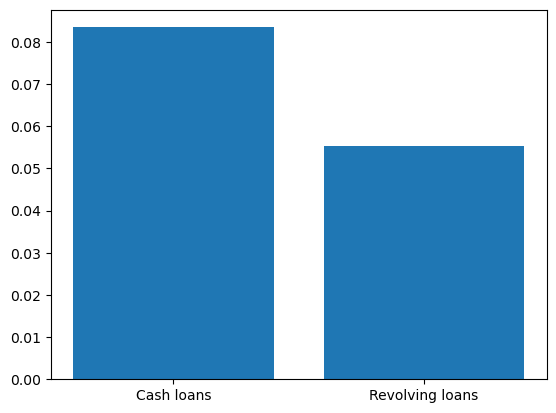

In [42]:
plt.bar(default_rate_loans.index, default_rate_loans.values)
plt.show()
# In the cash loans section the default rate is high compared to revolving loans

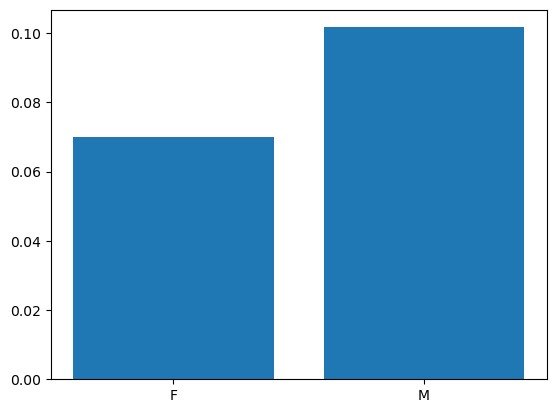

In [43]:
plt.bar(application.groupby('CODE_GENDER')['TARGET'].mean().index[:2], application.groupby('CODE_GENDER')['TARGET'].mean().values[:2])
plt.show()
# Males has high default rate

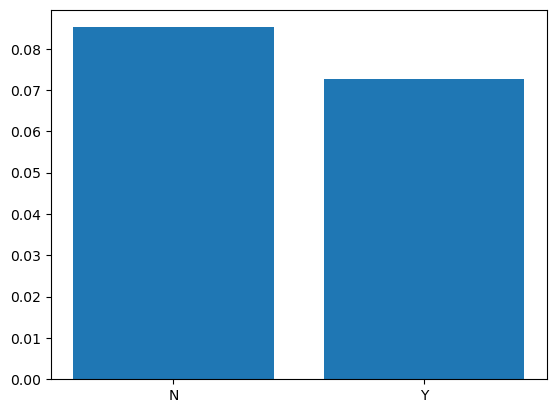

In [44]:
plt.bar(application.groupby('FLAG_OWN_CAR')['TARGET'].mean().index, application.groupby('FLAG_OWN_CAR')['TARGET'].mean().values)
plt.show()
# the candidated without car are defaulting high

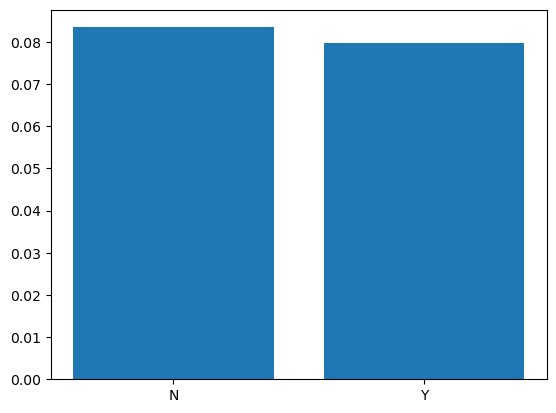

In [45]:
plt.bar(application.groupby('FLAG_OWN_REALTY')['TARGET'].mean().index, application.groupby('FLAG_OWN_REALTY')['TARGET'].mean().values)
plt.show()
# the applicants with without flats are are defaulting relatively high

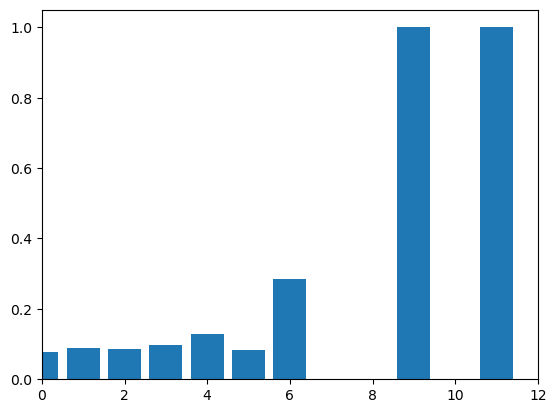

In [46]:
plt.bar(application.groupby('CNT_CHILDREN')['TARGET'].mean().index, application.groupby('CNT_CHILDREN')['TARGET'].mean().values)
plt.xlim([0,12])
plt.show()
# As the number of children increases the default rate increases

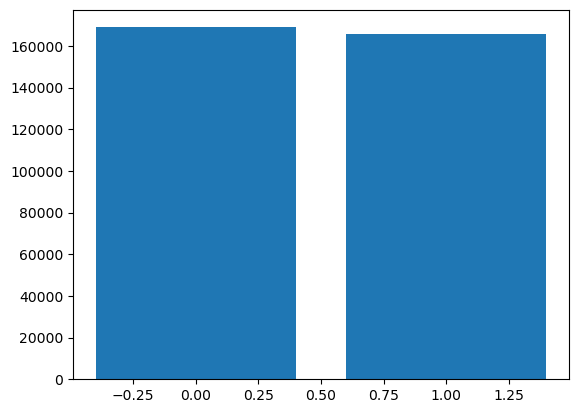

In [47]:
plt.bar(application.groupby('TARGET')['AMT_INCOME_TOTAL'].mean().index, application.groupby('TARGET')['AMT_INCOME_TOTAL'].mean().values)
plt.show()
# The average income of defaulting applicants is almost equal

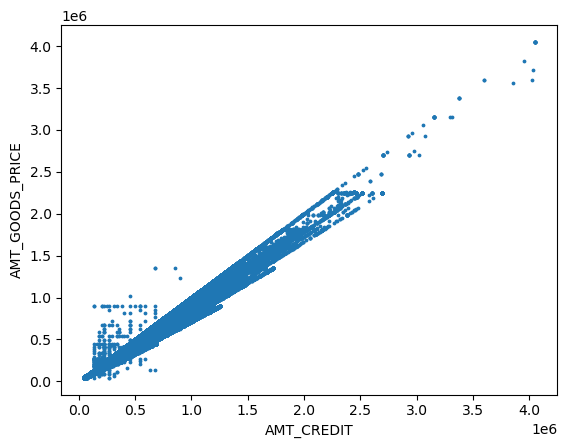

In [48]:
plt.scatter(application['AMT_CREDIT'], application['AMT_GOODS_PRICE'], s=3)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_GOODS_PRICE')
plt.show()

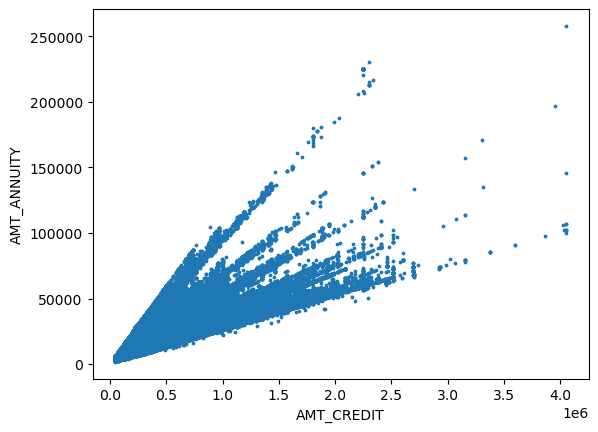

In [49]:
plt.scatter(application['AMT_CREDIT'], application['AMT_ANNUITY'], s=3)
plt.xlabel('AMT_CREDIT')
plt.ylabel('AMT_ANNUITY')
plt.show()

In [50]:
application.groupby('NAME_TYPE_SUITE')['TARGET'].mean().sort_values(ascending=False)

NAME_TYPE_SUITE
Other_B            0.098703
Other_A            0.087760
Group of people    0.085185
Unaccompanied      0.081892
Spouse, partner    0.078585
Family             0.074917
Children           0.074221
Name: TARGET, dtype: float64

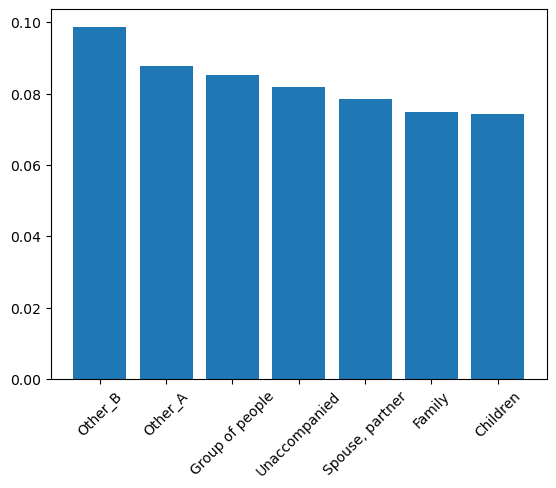

In [51]:
plt.bar(application.groupby('NAME_TYPE_SUITE')['TARGET'].mean().sort_values(ascending=False).index, application.groupby('NAME_TYPE_SUITE')['TARGET'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.show()

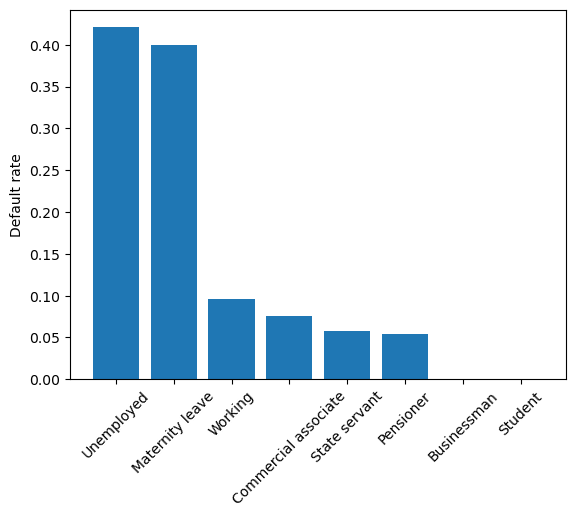

In [52]:
plt.bar(application.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False).index, application.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.ylabel('Default rate')
plt.show()

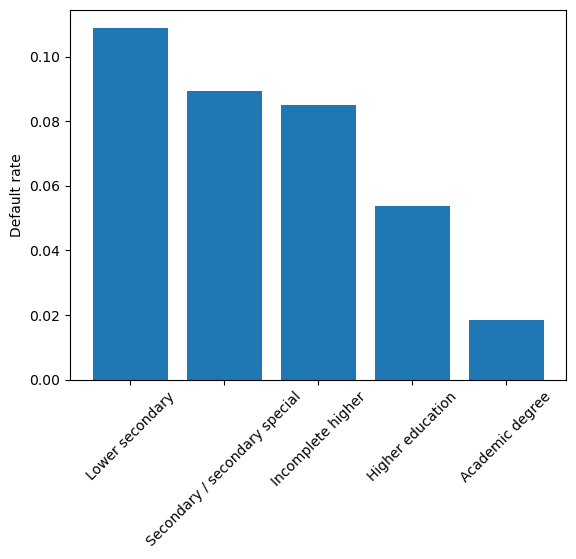

In [53]:
plt.bar(application.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False).index, application.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.ylabel('Default rate')
plt.show()
# As the education level increases, the default rate is decreasing

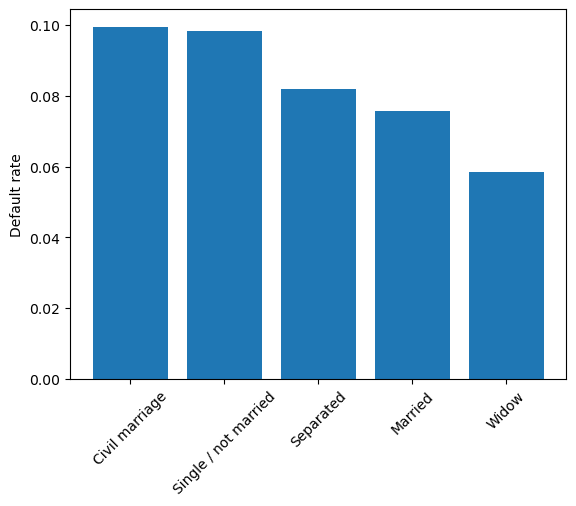

In [54]:
plt.bar(application.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending=False).index, application.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.ylabel('Default rate')
plt.show()

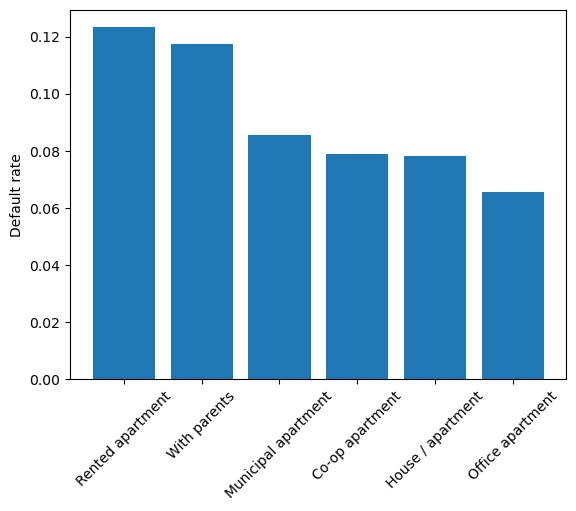

In [55]:
plt.bar(application.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending=False).index, application.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.ylabel('Default rate')
plt.show()

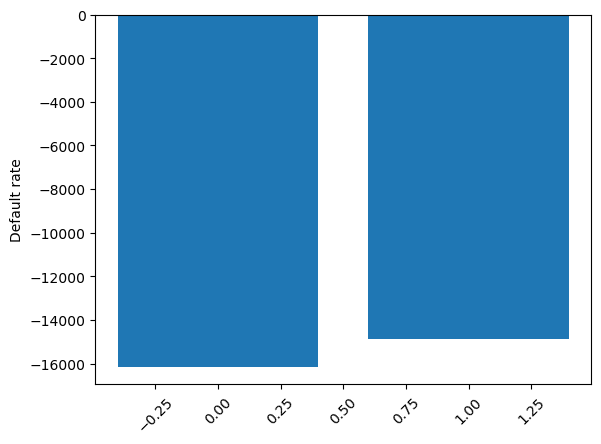

In [56]:
plt.bar(application.groupby('TARGET')['DAYS_BIRTH'].mean().sort_values(ascending=False).index, application.groupby('TARGET')['DAYS_BIRTH'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.ylabel('Default rate')
plt.show()

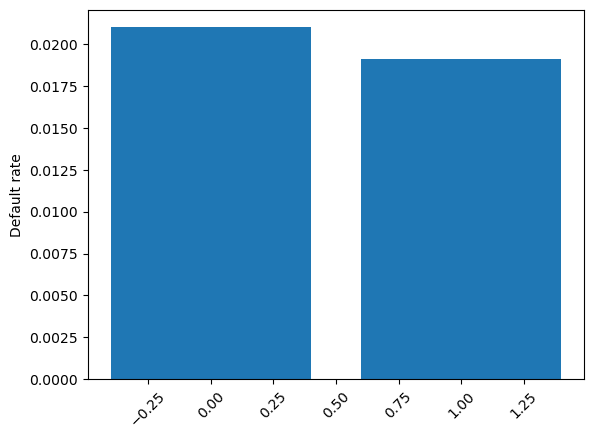

In [57]:
plt.bar(application.groupby('TARGET')['REGION_POPULATION_RELATIVE'].mean().sort_values(ascending=False).index, application.groupby('TARGET')['REGION_POPULATION_RELATIVE'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.ylabel('Default rate')
plt.show()
# The default rate is high where population is low relatively, implies rural areas where the population is low

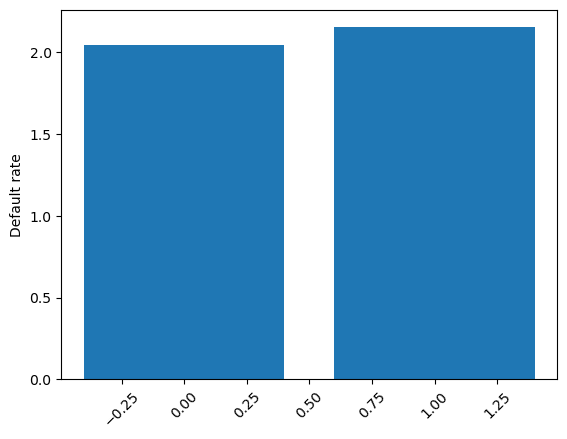

In [58]:
plt.bar(application.groupby('TARGET')['REGION_RATING_CLIENT'].mean().sort_values(ascending=False).index, application.groupby('TARGET')['REGION_RATING_CLIENT'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.ylabel('Default rate')
plt.show()
# it is proven by this graph that high rated regions like cities 1 towns 2 rural 3, rural have high default rate

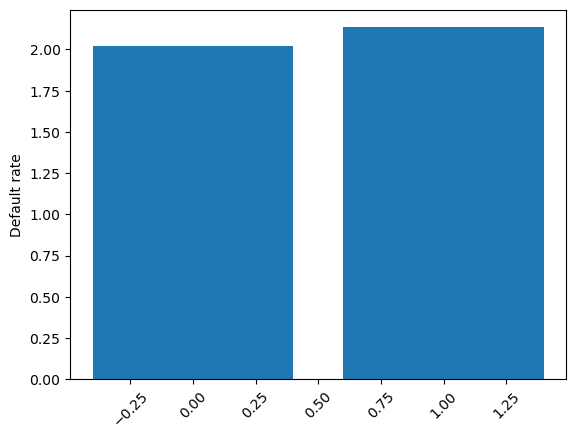

In [59]:
plt.bar(application.groupby('TARGET')['REGION_RATING_CLIENT_W_CITY'].mean().sort_values(ascending=False).index, application.groupby('TARGET')['REGION_RATING_CLIENT_W_CITY'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.ylabel('Default rate')
plt.show()
# same is proven here that towns and rural areas have high default rate

In [60]:
application['income/debt'] = application['AMT_INCOME_TOTAL']*12/application['AMT_CREDIT']

In [61]:
application.groupby('TARGET')['income/debt'].mean()

TARGET
0    4.790479
1    4.754753
Name: income/debt, dtype: float64

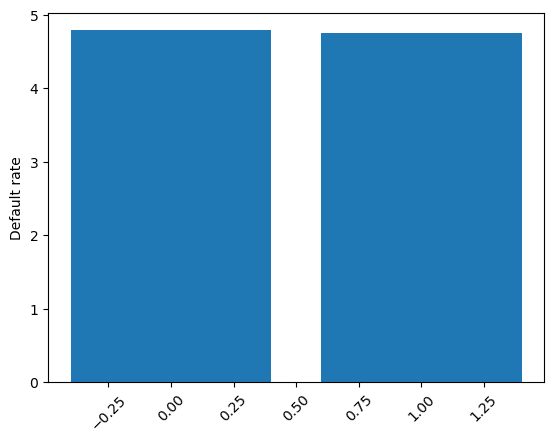

In [62]:
plt.bar(application.groupby('TARGET')['income/debt'].mean().sort_values(ascending=False).index, application.groupby('TARGET')['income/debt'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.ylabel('Default rate')
plt.show()

# Financial Analysis

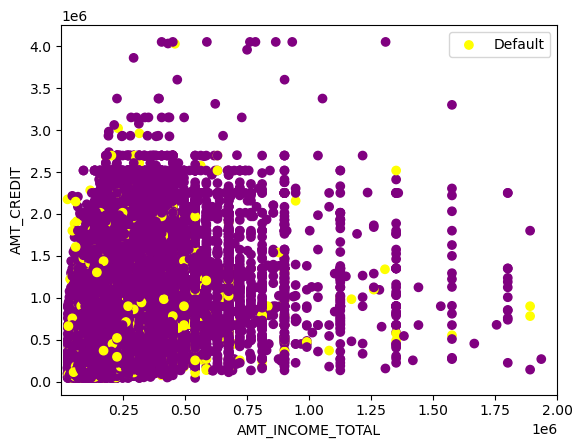

In [63]:
plt.scatter(application['AMT_INCOME_TOTAL'], application['AMT_CREDIT'], c=application['TARGET'].map({0:"purple", 1:"yellow"}))
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('AMT_CREDIT')
plt.legend(labels=['Default', 'Non- Default'])
plt.xlim((1000,2000000))
plt.show()
# As the income increases, the default rate is decreasing

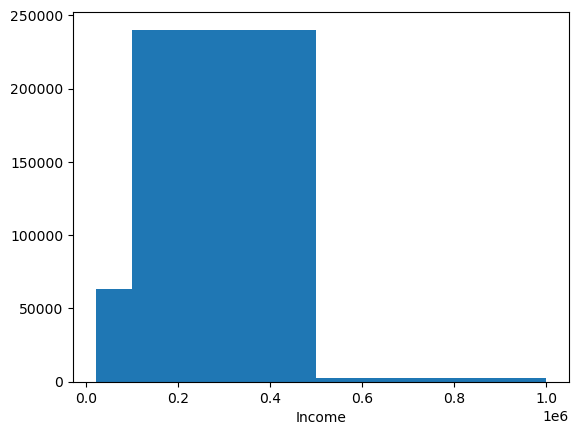

In [64]:
# Income Distribution
plt.hist(application['AMT_INCOME_TOTAL'], bins=[20000,100000,500000,1000000])
plt.xlabel('Income')
plt.show()

In [65]:
previous = pd.read_csv('previous_application.csv')

In [66]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
application.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',

In [68]:
previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [69]:
previous.iloc[:,10:25]

,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE
0,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA
1,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell
2,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell
3,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell
4,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA
1670210,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA
1670211,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA
1670212,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell


In [70]:
merged_df = pd.merge(application, previous, on='SK_ID_CURR', how='inner')

In [71]:
merged_df[['AMT_APPLICATION', 'AMT_INCOME_TOTAL']]

,AMT_APPLICATION,AMT_INCOME_TOTAL
0,179055.0,202500.0
1,900000.0,270000.0
2,337500.0,270000.0
3,68809.5,270000.0
4,24282.0,67500.0
...,...,...
1409249,229500.0,157500.0
1409250,45000.0,157500.0
1409251,765000.0,157500.0
1409252,1170000.0,157500.0


In [72]:
merged_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=107)

In [73]:
status = merged_df.groupby(['TARGET', 'NAME_CONTRACT_STATUS']).size().unstack(fill_value=0).T

In [74]:
status

TARGET,0,1
NAME_CONTRACT_STATUS,,
Approved,816183,67114
Canceled,234913,23755
Refused,215246,29343
Unused offer,20823,1877


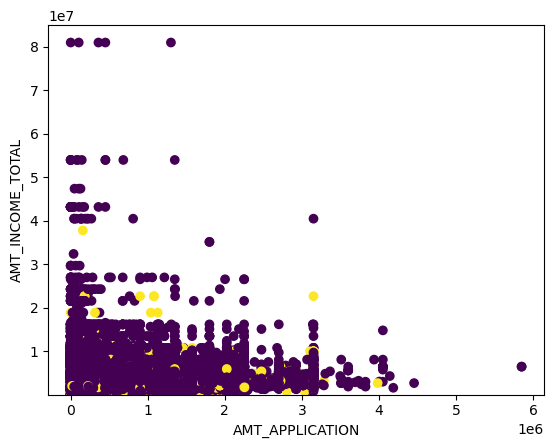

In [75]:
plt.scatter(merged_df['AMT_APPLICATION'], merged_df['AMT_INCOME_TOTAL']*12, c=merged_df['TARGET'])
plt.ylim([25000,85000000])
plt.xlabel('AMT_APPLICATION')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

In [76]:
merged_df['Inquires_to_credit_bureau'] = (merged_df['AMT_REQ_CREDIT_BUREAU_HOUR']+merged_df['AMT_REQ_CREDIT_BUREAU_DAY']+merged_df['AMT_REQ_CREDIT_BUREAU_WEEK']+merged_df['AMT_REQ_CREDIT_BUREAU_MON']+merged_df['AMT_REQ_CREDIT_BUREAU_QRT']+merged_df['AMT_REQ_CREDIT_BUREAU_YEAR'])/6

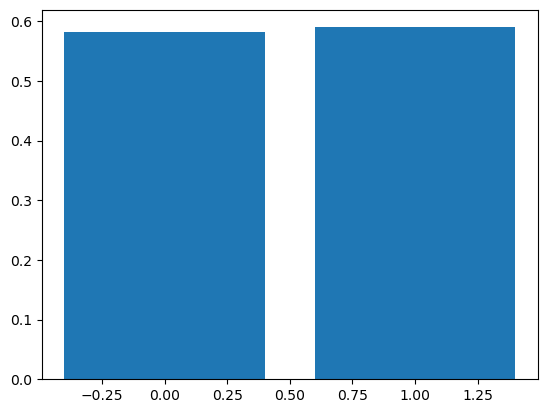

In [77]:
plt.bar(merged_df.groupby('TARGET')['Inquires_to_credit_bureau'].mean().sort_values(ascending=False).index, merged_df.groupby('TARGET')['Inquires_to_credit_bureau'].mean().sort_values(ascending=False).values)
plt.show()

In [78]:
status.groupby(level=0).mean()

TARGET,0,1
NAME_CONTRACT_STATUS,,
Approved,816183.0,67114.0
Canceled,234913.0,23755.0
Refused,215246.0,29343.0
Unused offer,20823.0,1877.0


Text(0.5, 1.0, 'Defaulted Applicants')

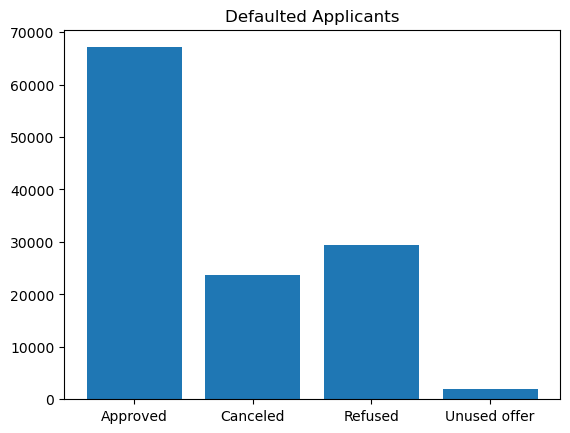

In [79]:
plt.bar(status.index, status[1])
plt.title('Defaulted Applicants')


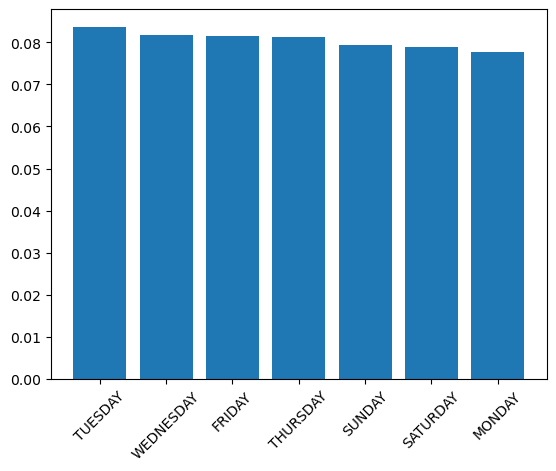

In [80]:
plt.bar(application.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].mean().sort_values(ascending=False).index, application.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].mean().sort_values(ascending=False).values)
plt.xticks(rotation = 45)
plt.show()

In [81]:
application.groupby('WEEKDAY_APPR_PROCESS_START')['TARGET'].mean().sort_values(ascending=False).index

Index(['TUESDAY', 'WEDNESDAY', 'FRIDAY', 'THURSDAY', 'SUNDAY', 'SATURDAY',
       'MONDAY'],
      dtype='object', name='WEEKDAY_APPR_PROCESS_START')

# Model

In [82]:
application

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,income/debt
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,5.976426
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.504827
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,5.180974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.842105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0.0,0.0,0.0,1.0,2.0,6.0,7.420495
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,3.205342
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,2.709307
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,5.544343


In [83]:
application.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306199 entries, 0 to 307510
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   306199 non-null  int64  
 1   TARGET                       306199 non-null  int64  
 2   NAME_CONTRACT_TYPE           306199 non-null  object 
 3   CODE_GENDER                  306199 non-null  object 
 4   FLAG_OWN_CAR                 306199 non-null  object 
 5   FLAG_OWN_REALTY              306199 non-null  object 
 6   CNT_CHILDREN                 306199 non-null  int64  
 7   AMT_INCOME_TOTAL             306199 non-null  float64
 8   AMT_CREDIT                   306199 non-null  float64
 9   AMT_ANNUITY                  306199 non-null  float64
 10  AMT_GOODS_PRICE              306199 non-null  float64
 11  NAME_TYPE_SUITE              306199 non-null  object 
 12  NAME_INCOME_TYPE             306199 non-null  object 
 13 

In [171]:
df = application.drop(['SK_ID_CURR','income/debt'],axis=1)

In [172]:
df

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,2.0,6.0
307507,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
y = df['TARGET']

In [174]:
y

0         1
1         0
2         0
3         0
4         0
         ..
307506    0
307507    0
307508    0
307509    1
307510    0
Name: TARGET, Length: 306199, dtype: int64

In [175]:
obj_cols = df.select_dtypes('object').columns

## Handling Outliers

In [176]:
num_columns = df.select_dtypes(['int', 'float']).columns
num_columns

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT

In [177]:
out_cols = ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED','DAYS_REGISTRATION','CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


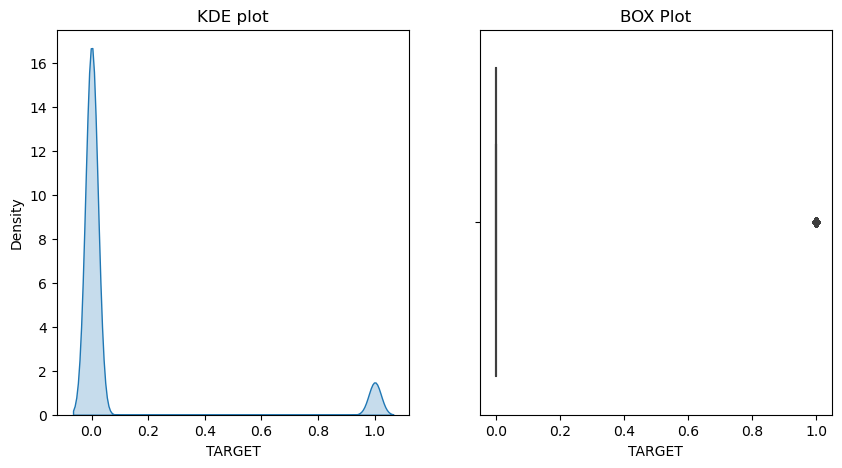

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


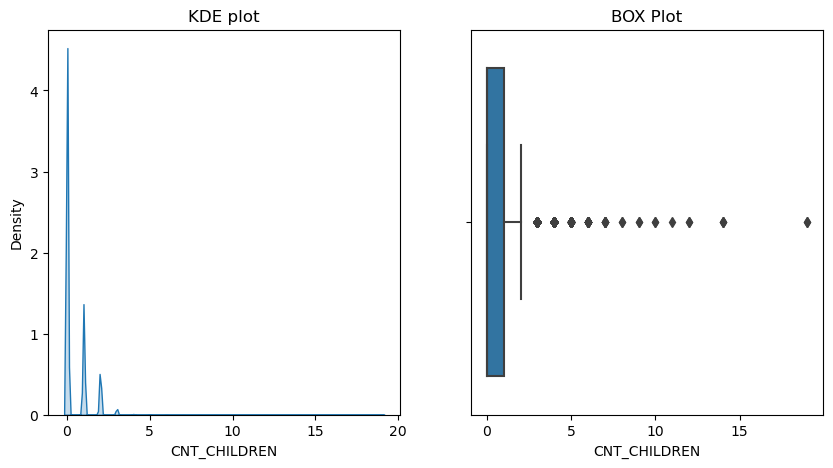

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


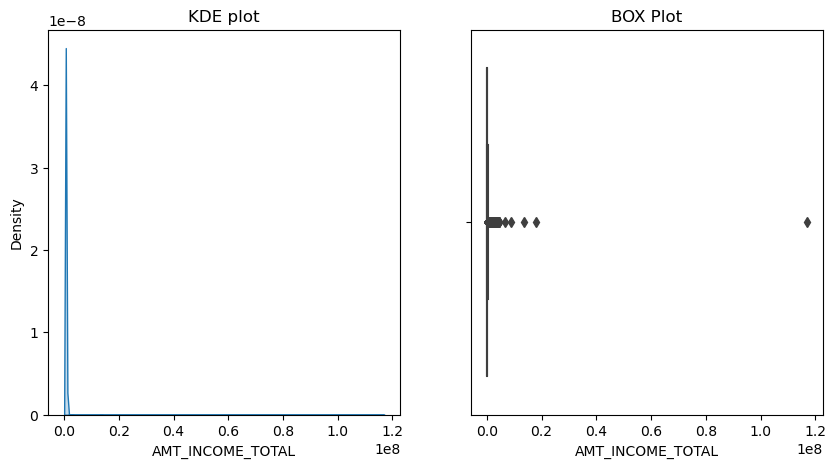

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


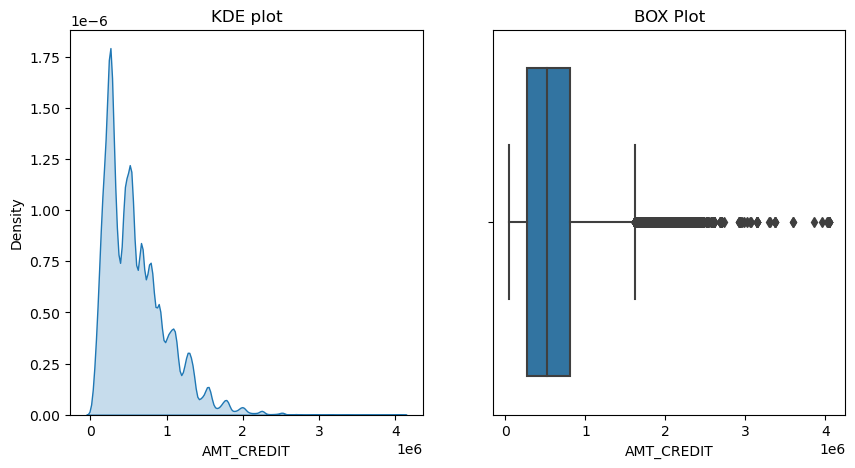

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


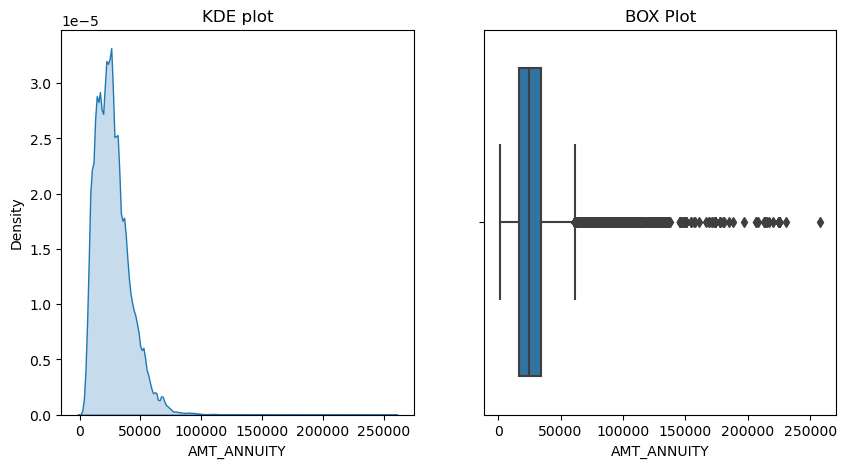

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


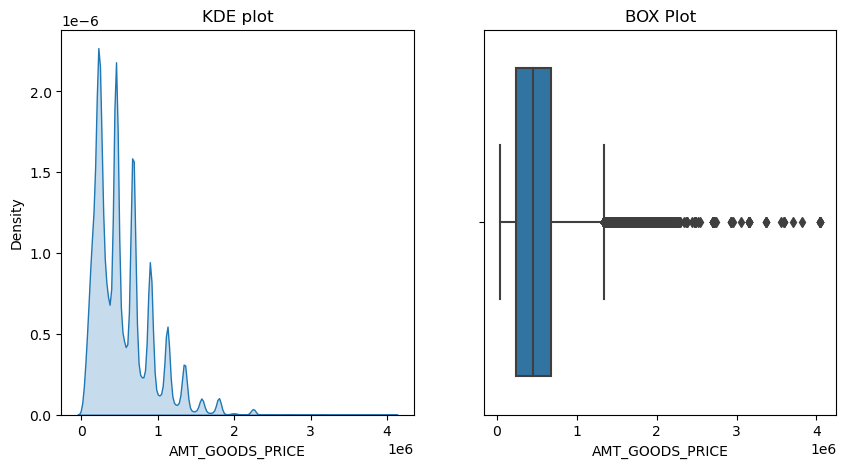

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


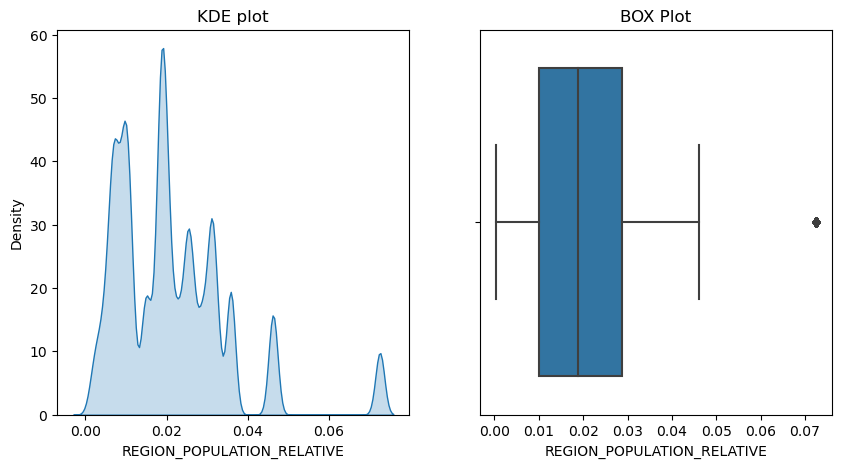

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


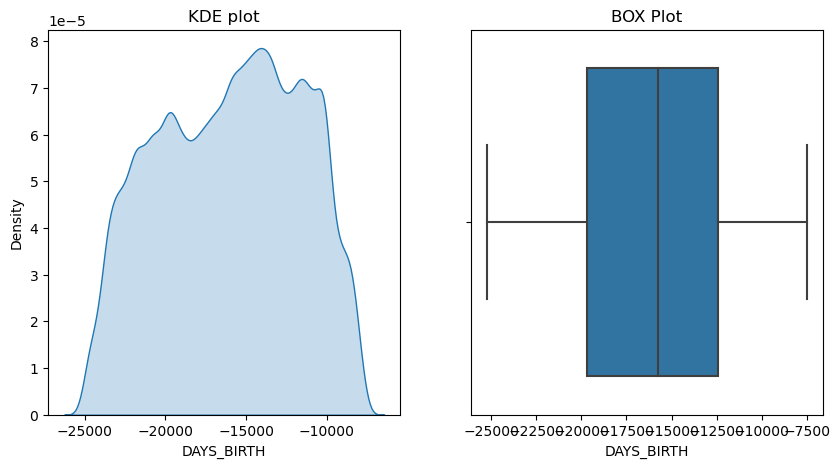

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


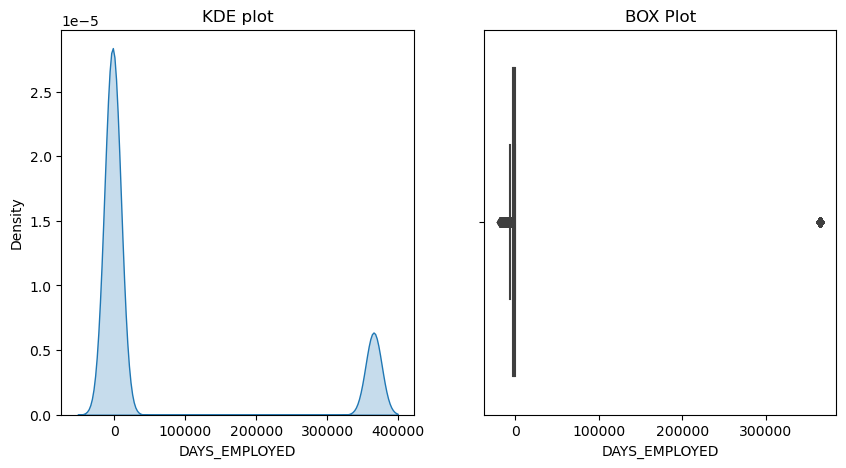

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


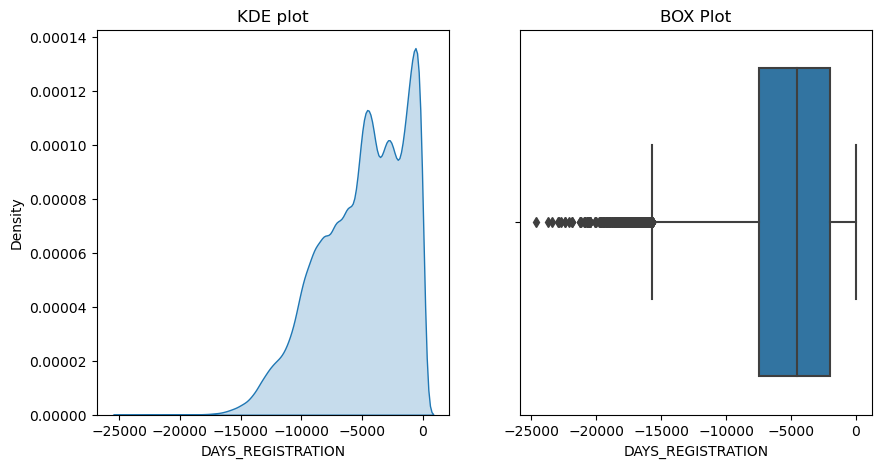

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


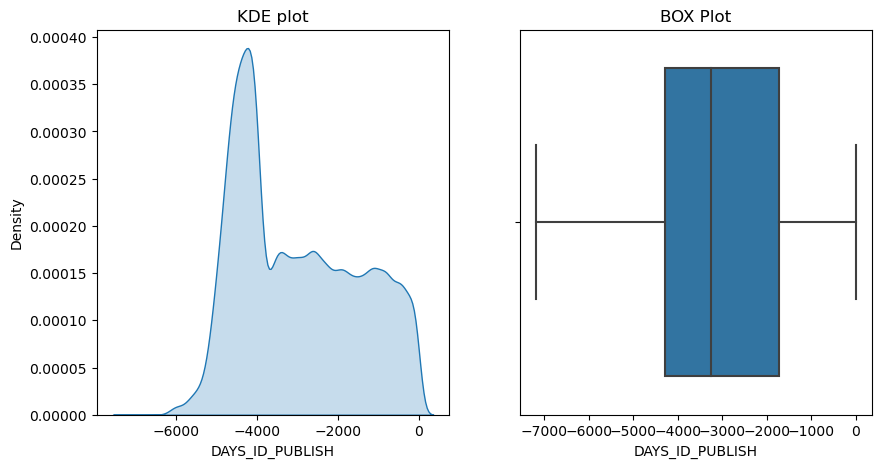

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


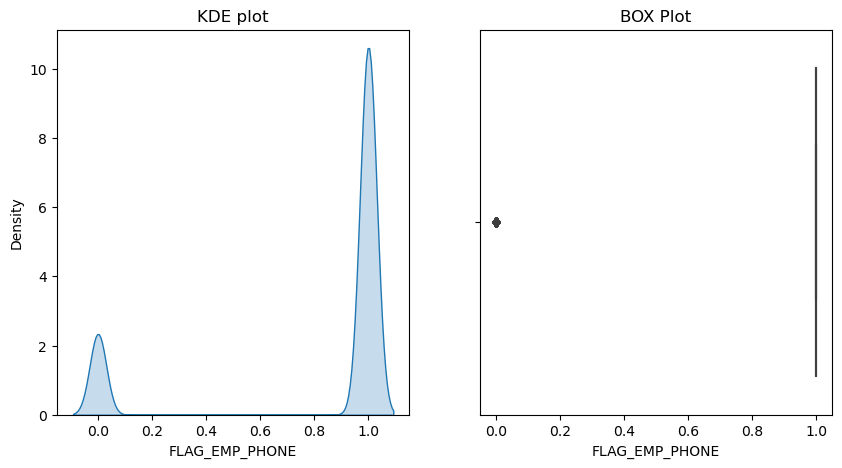

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


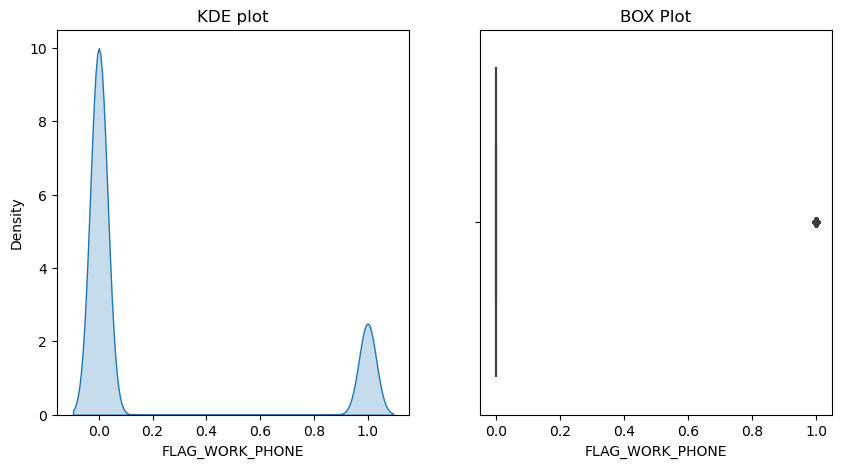

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


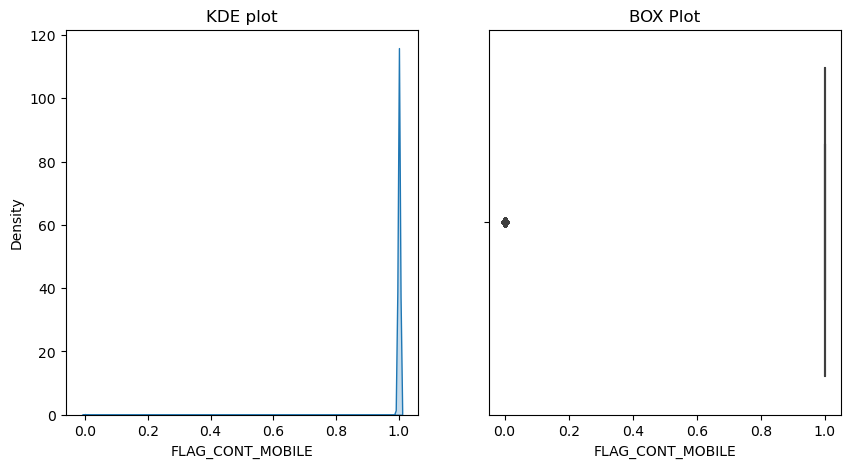

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


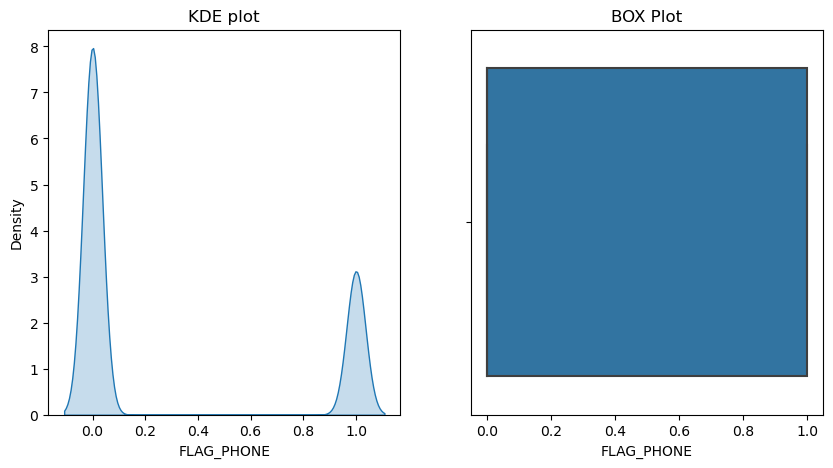

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


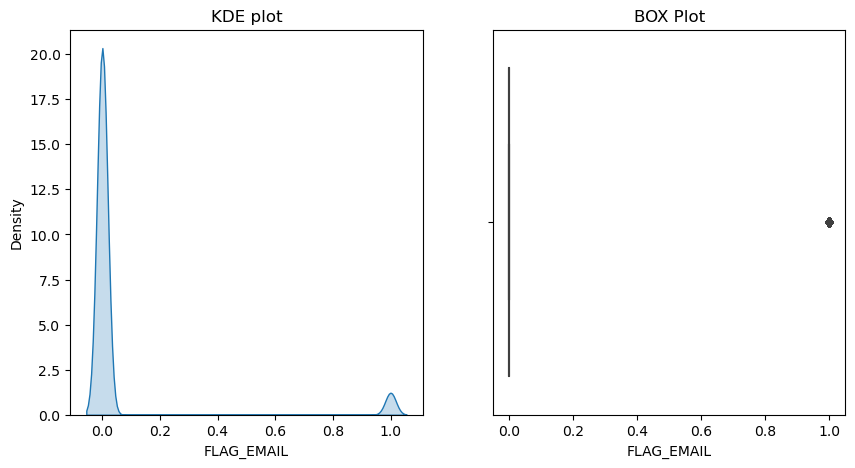

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


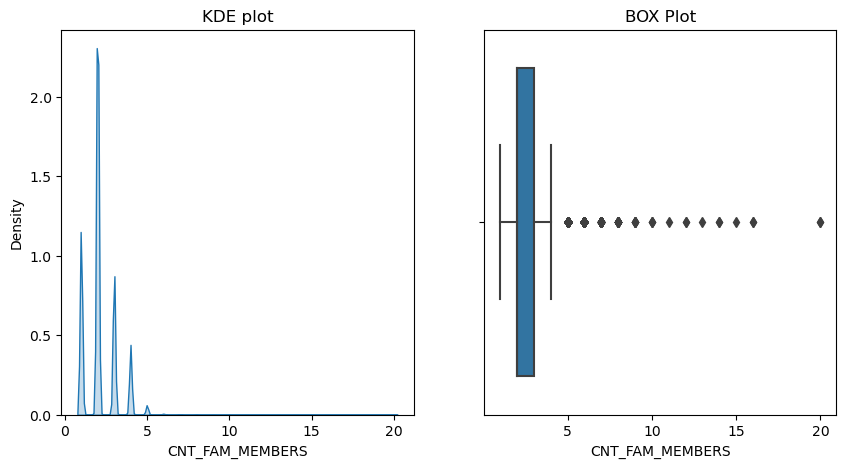

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


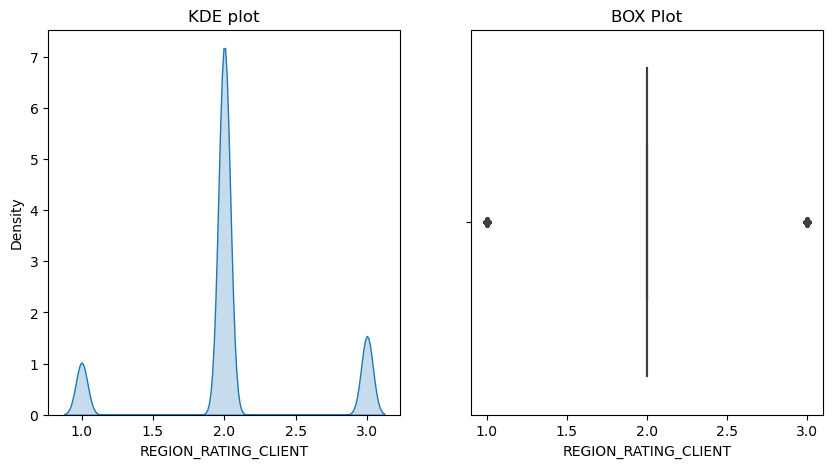

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


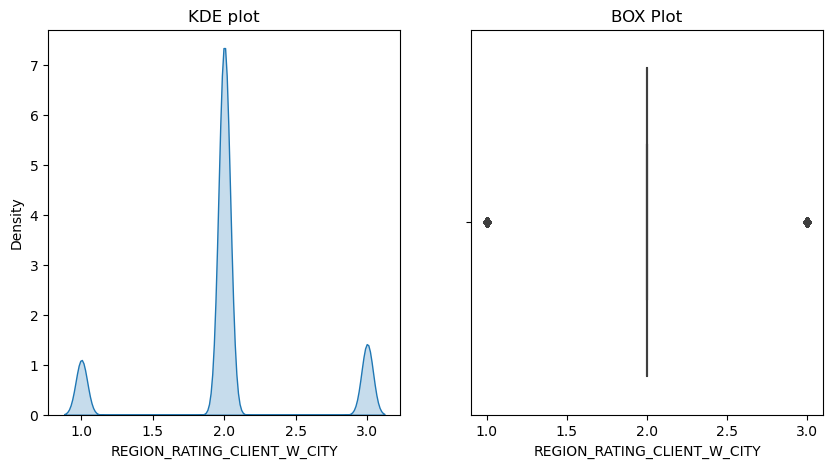

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


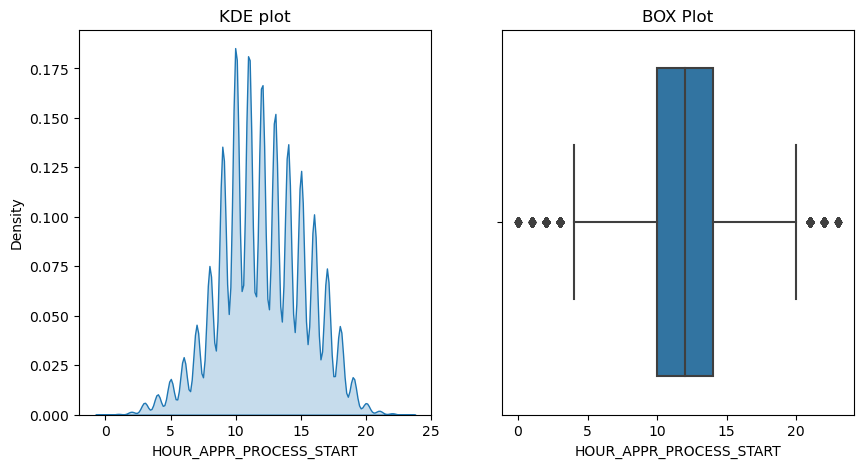

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


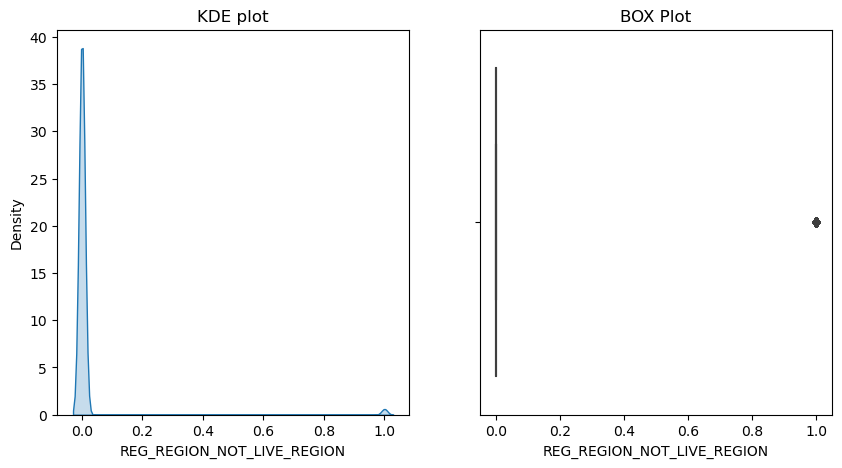

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


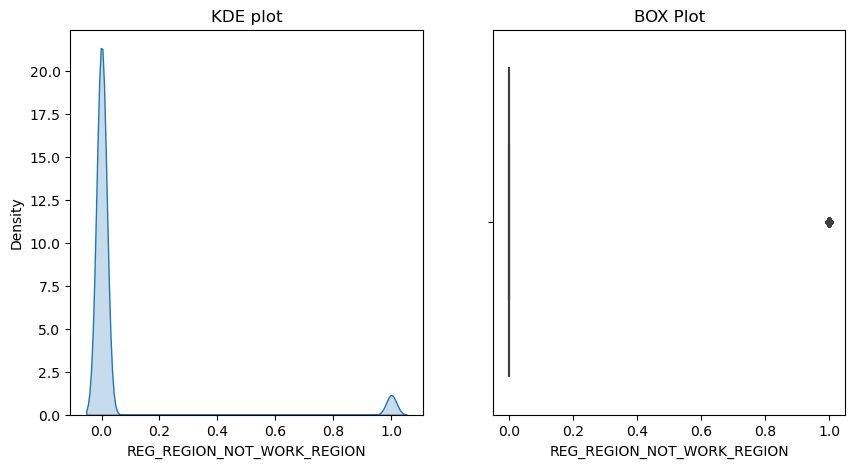

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


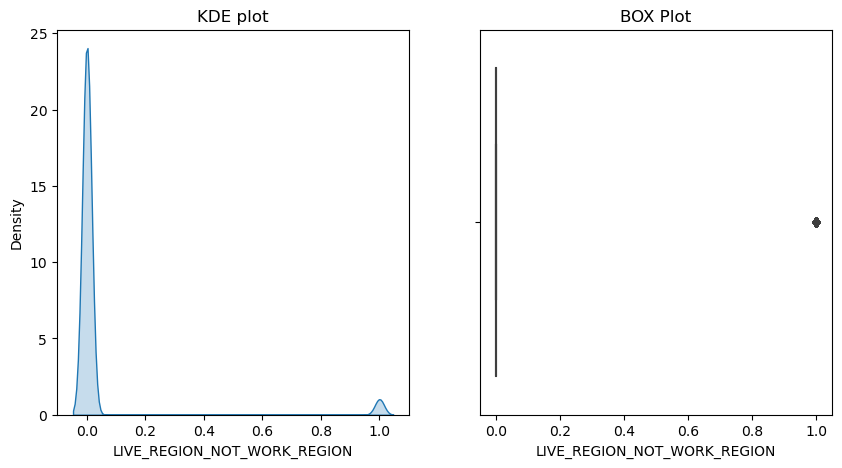

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


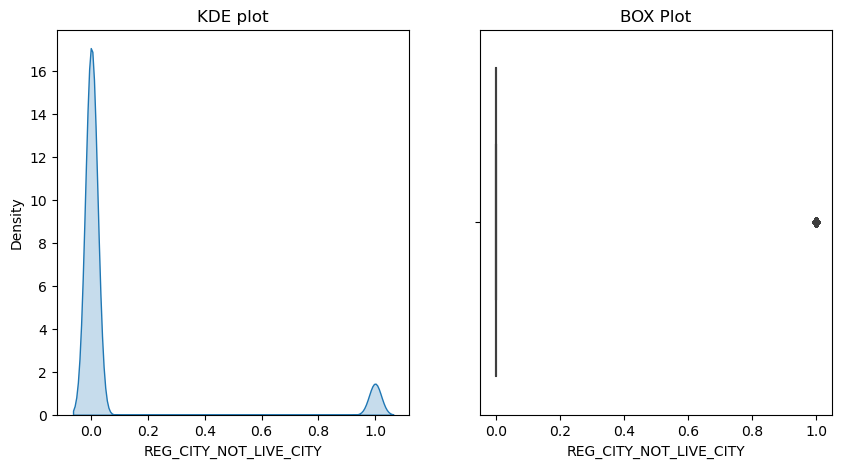

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


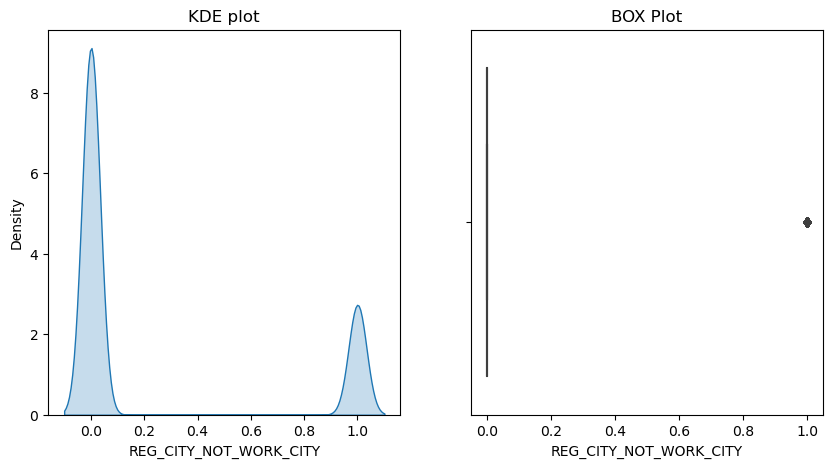

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


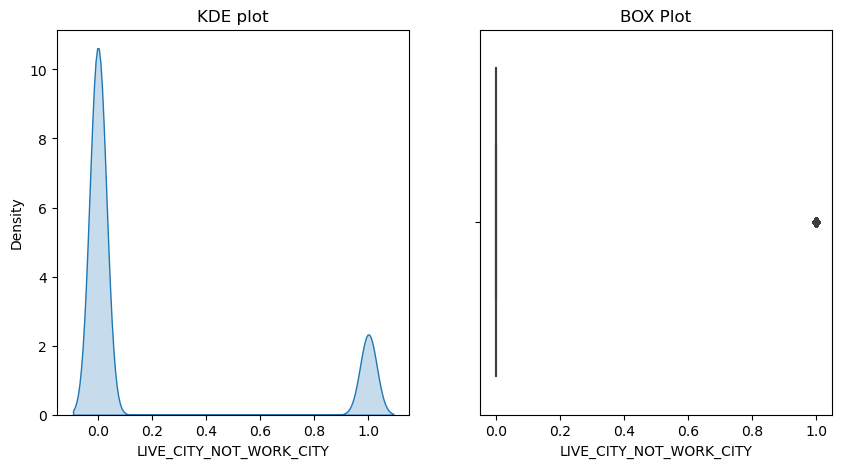

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


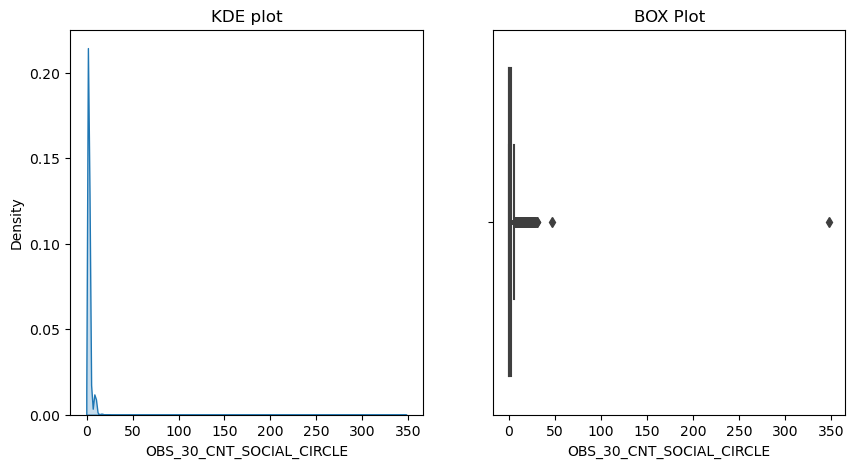

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


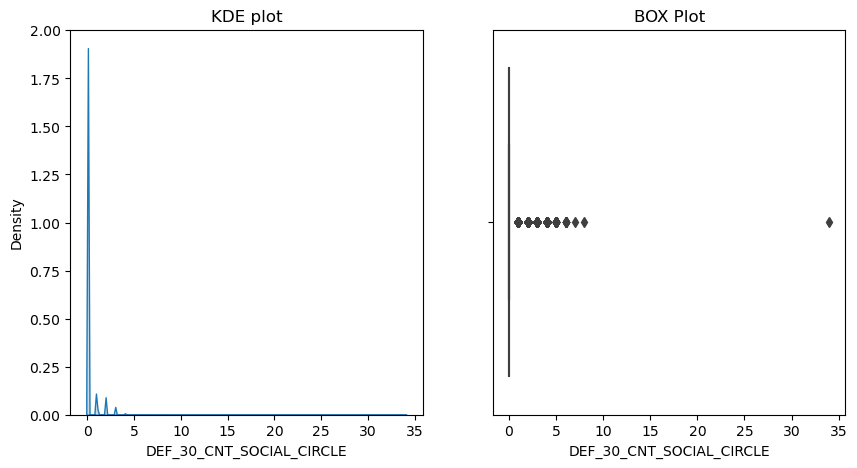

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


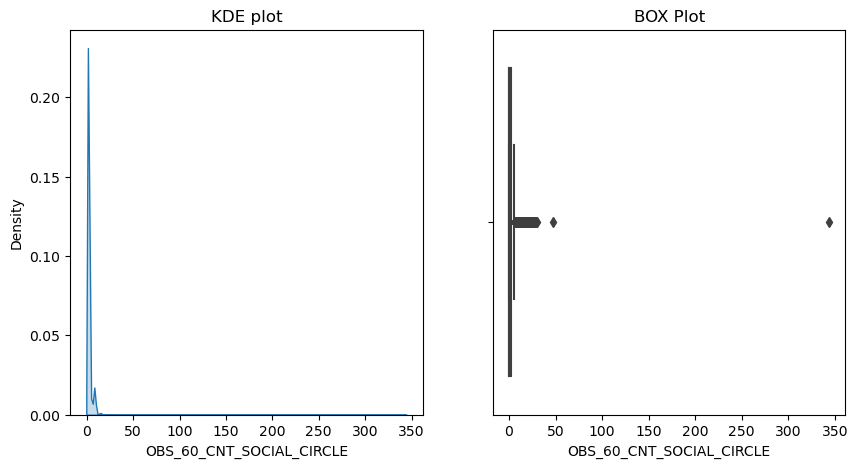

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


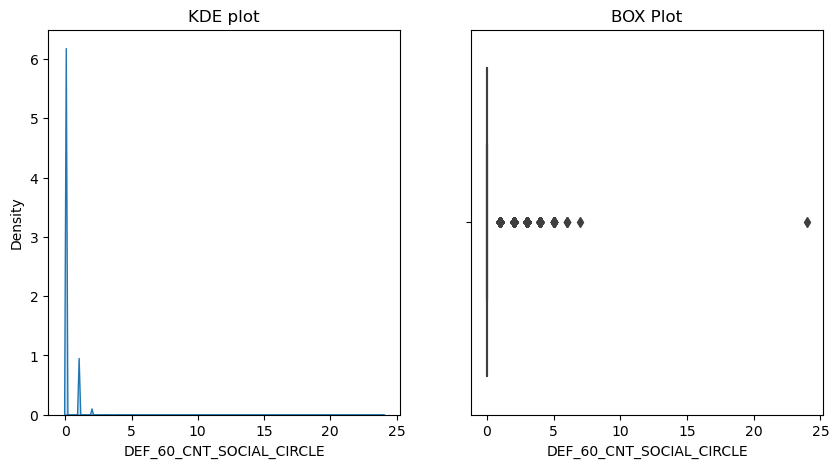

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


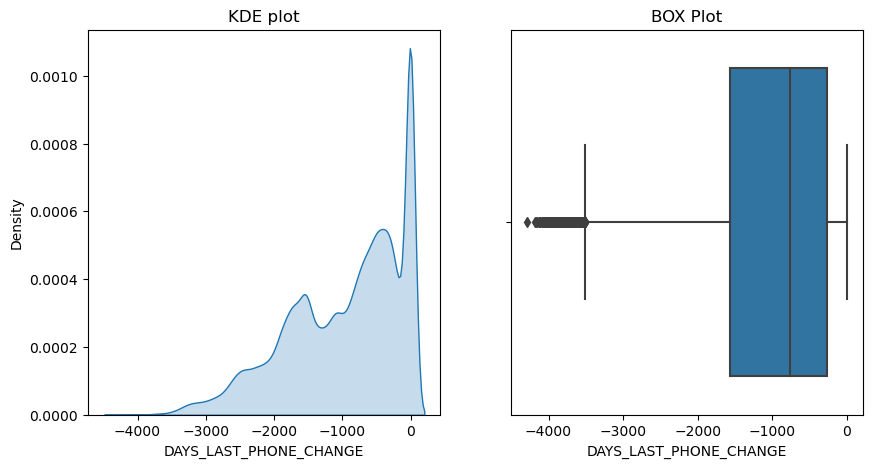

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


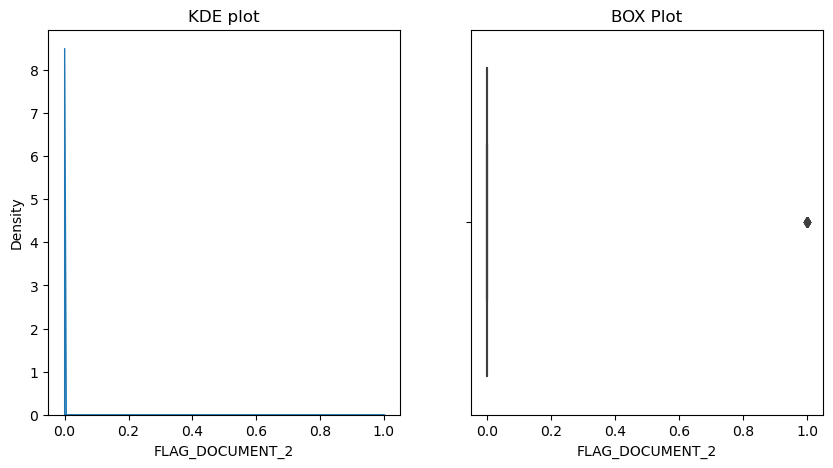

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


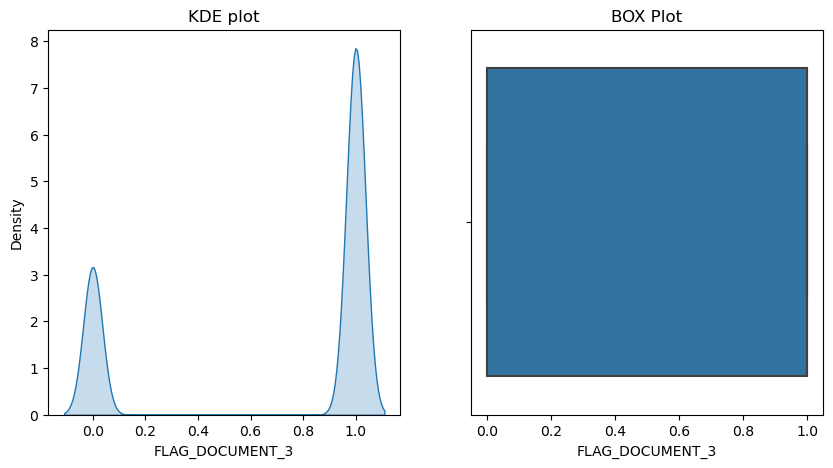

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


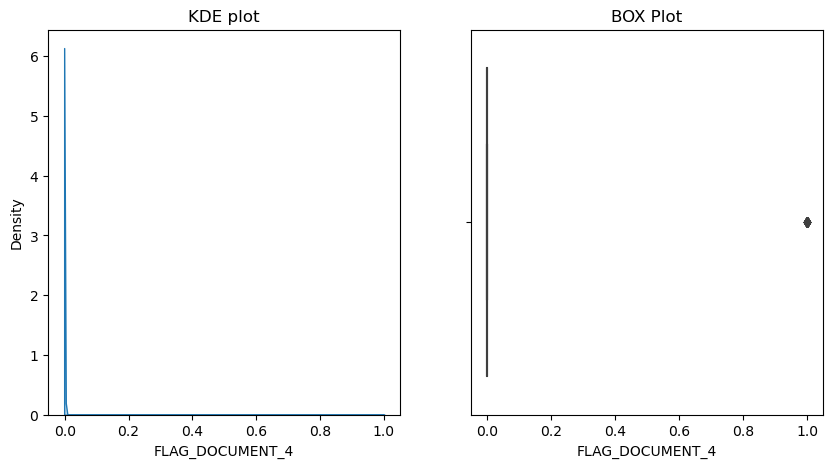

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


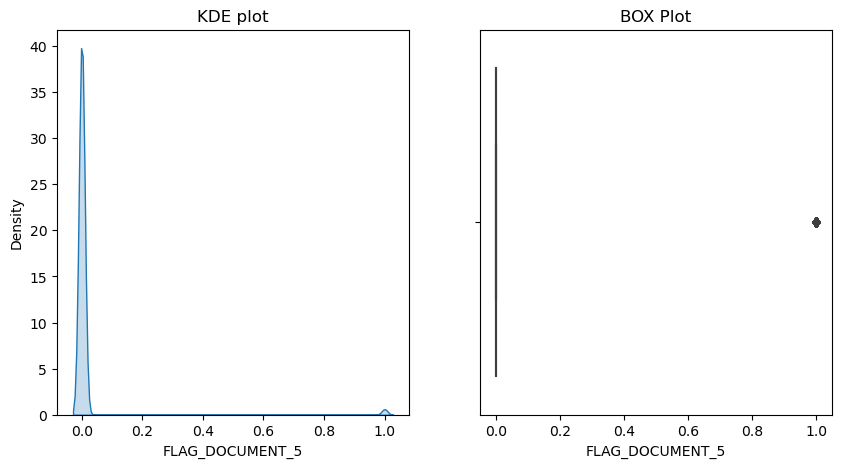

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


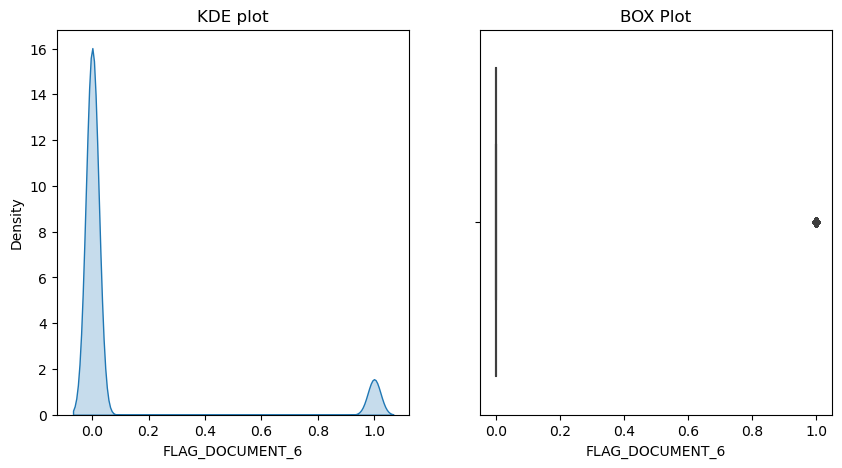

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


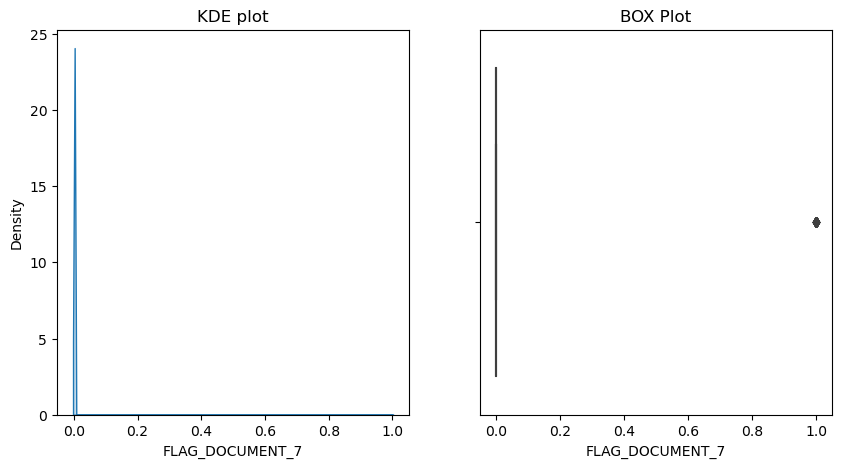

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


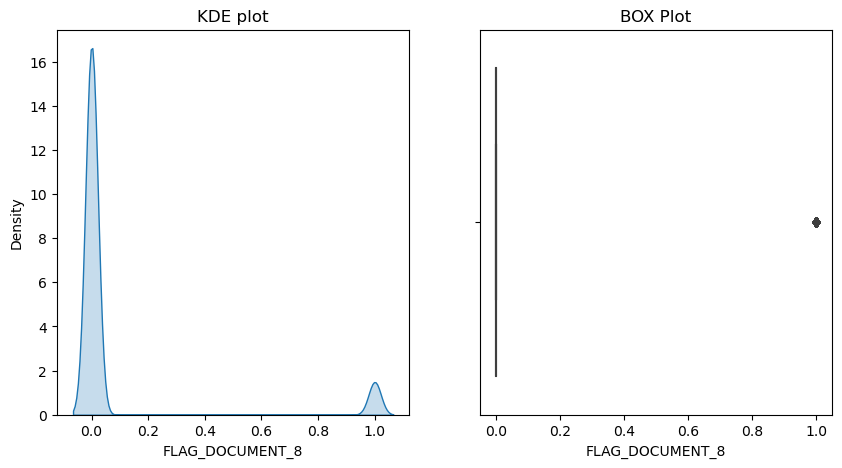

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


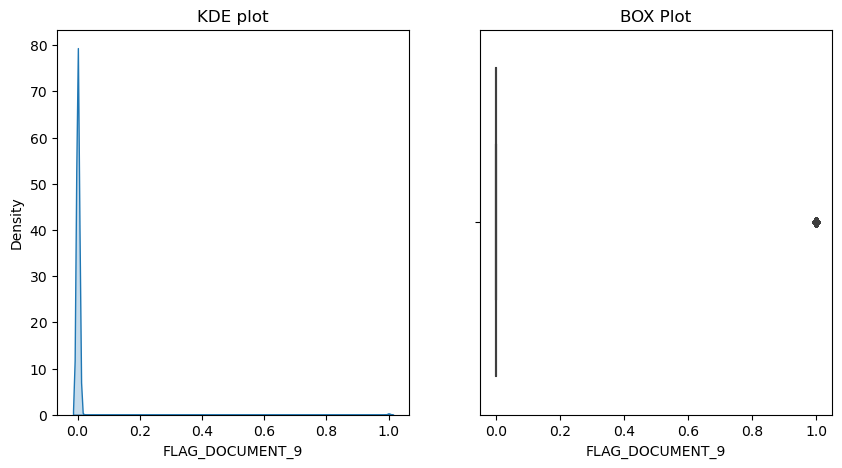

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


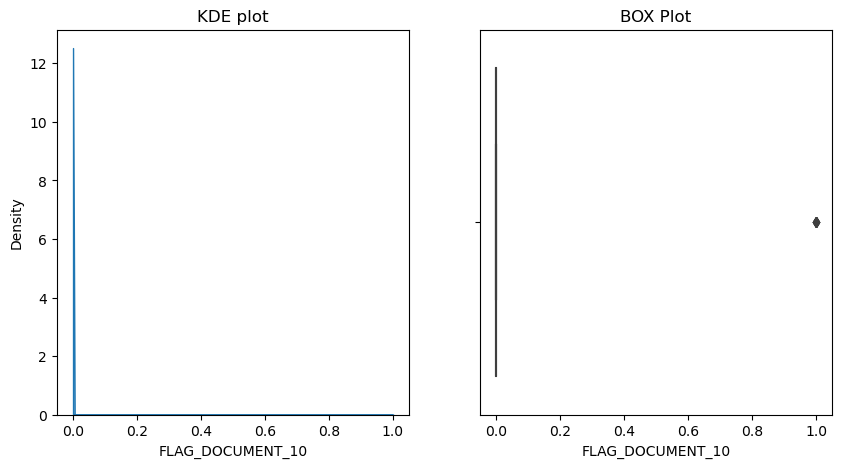

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


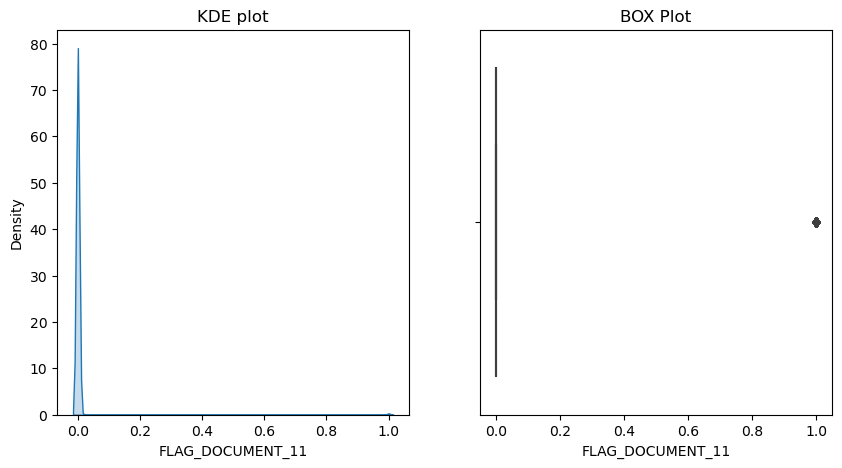

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


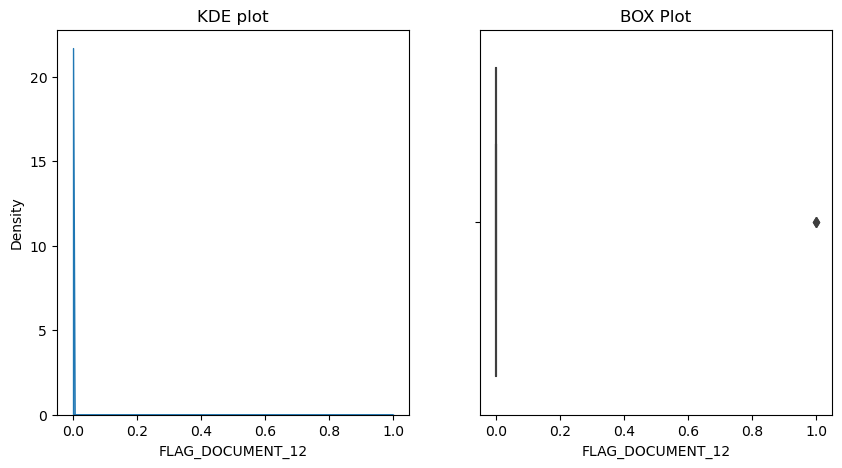

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


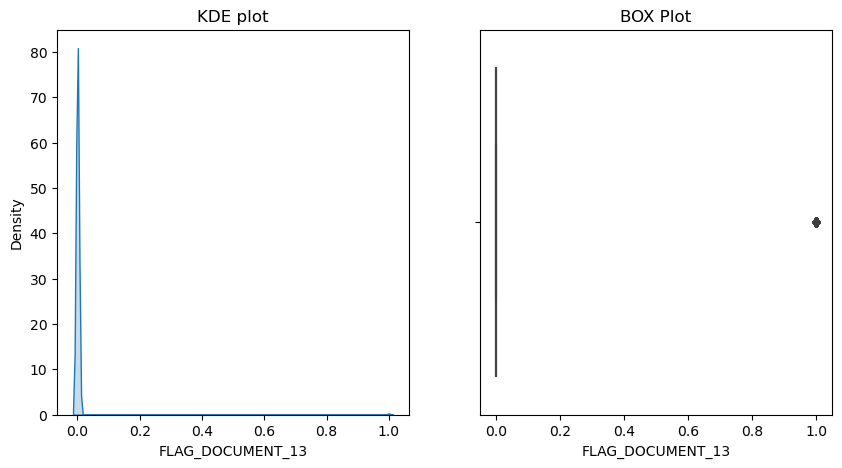

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


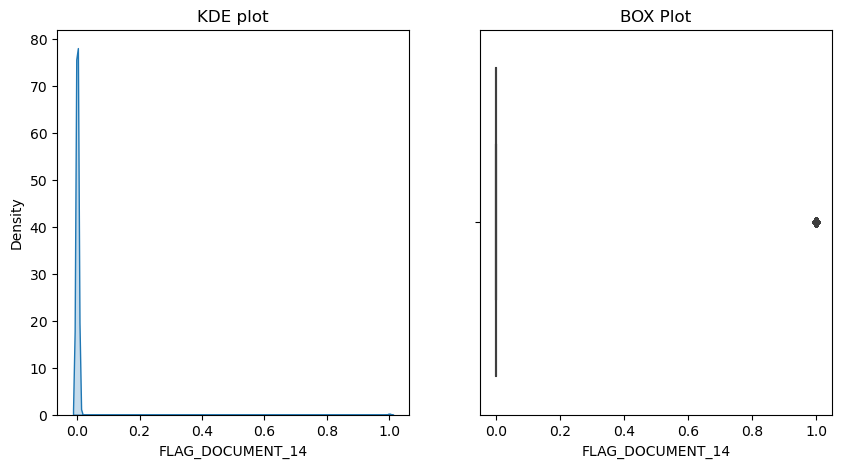

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


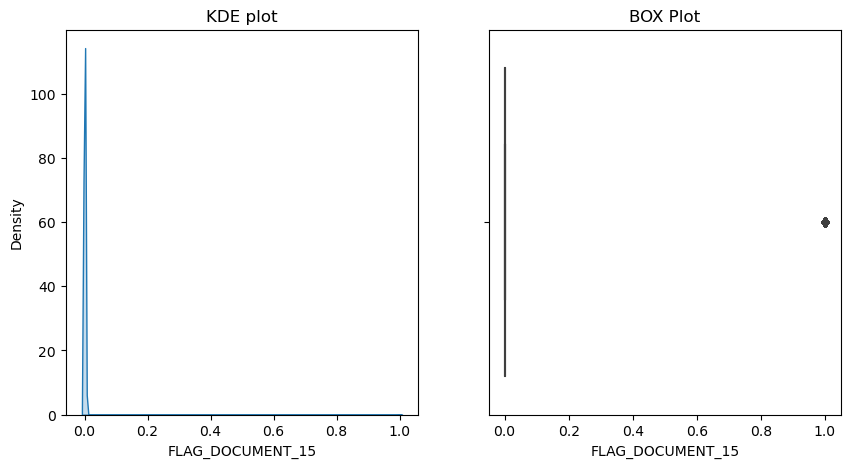

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


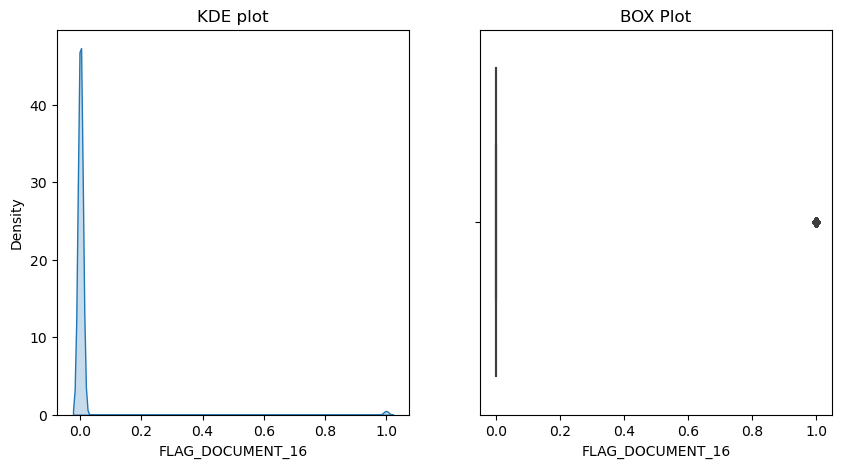

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


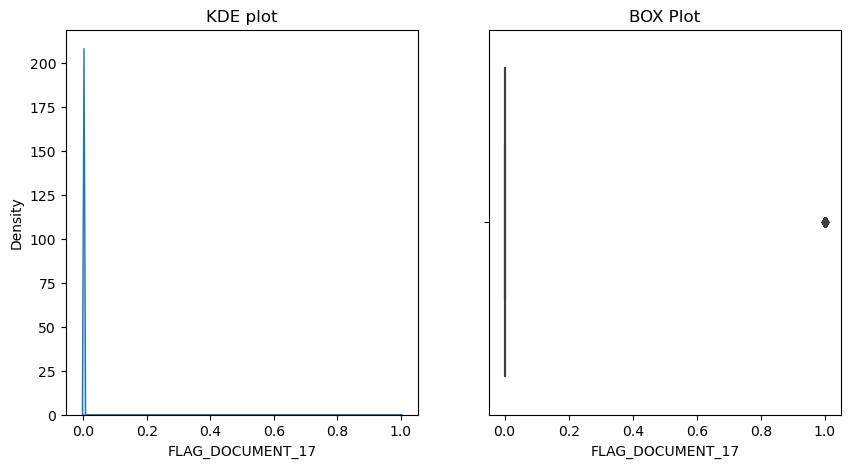

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


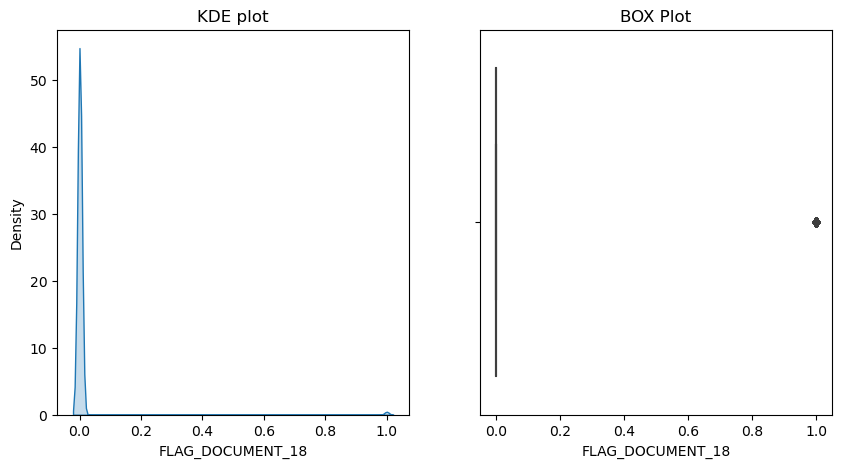

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


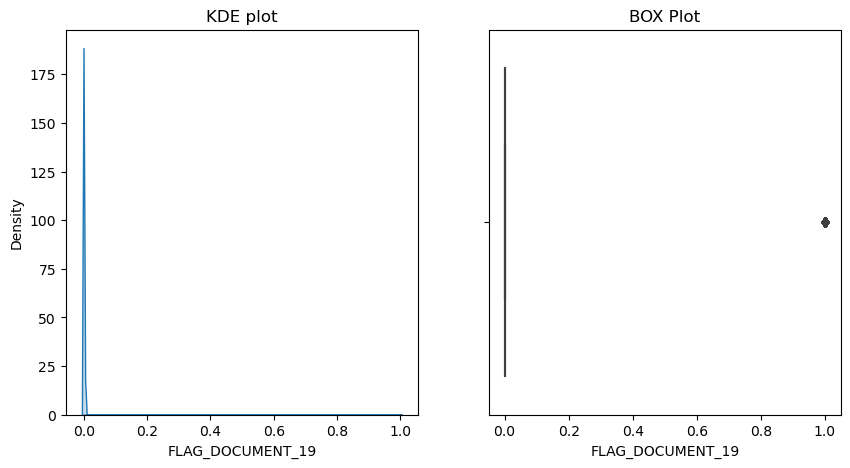

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


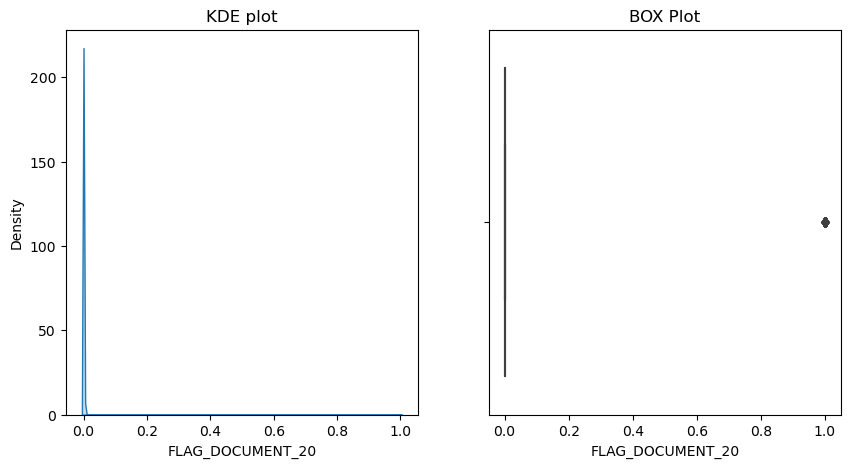

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


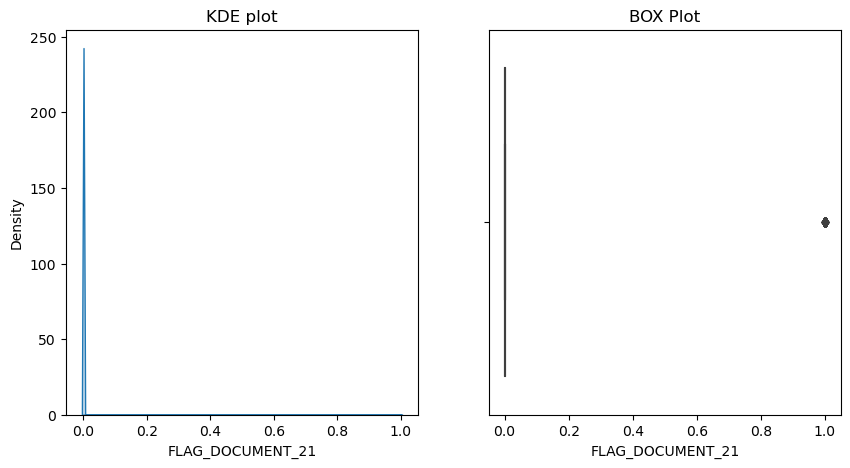

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


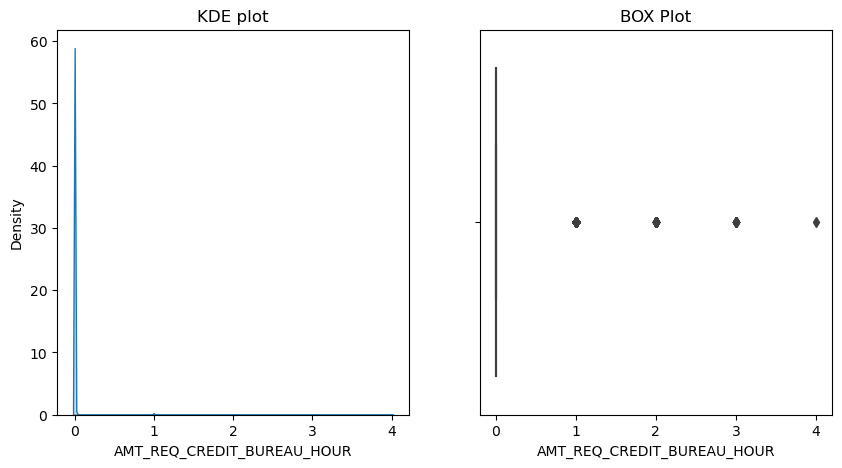

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


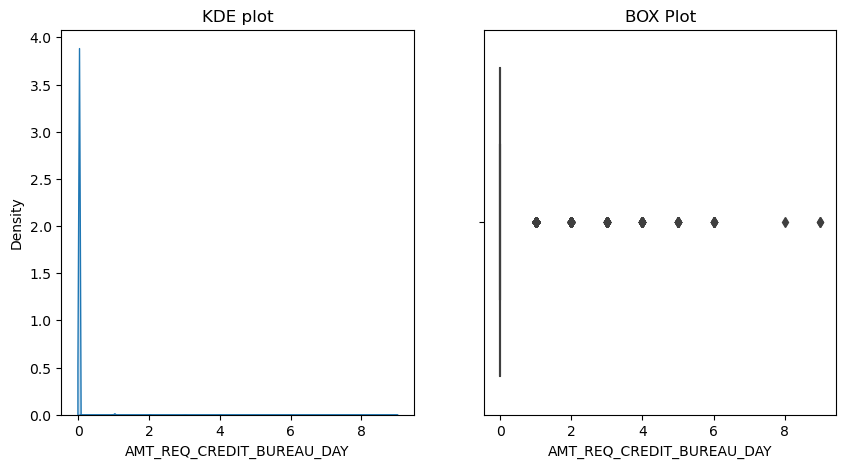

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


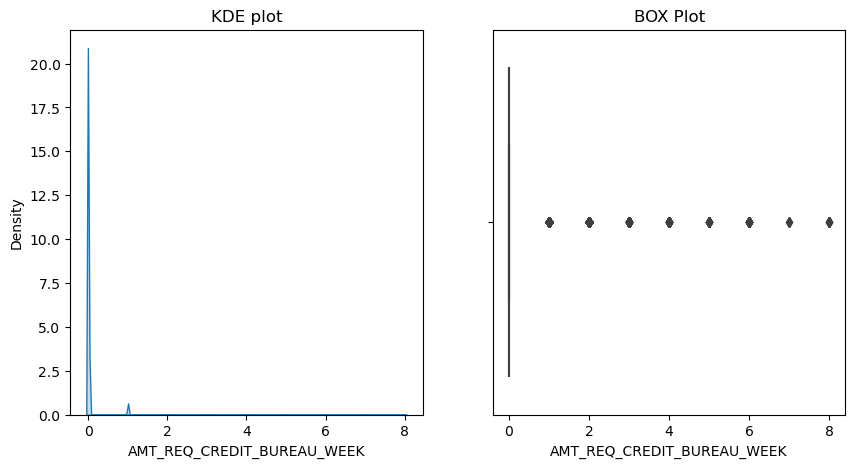

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


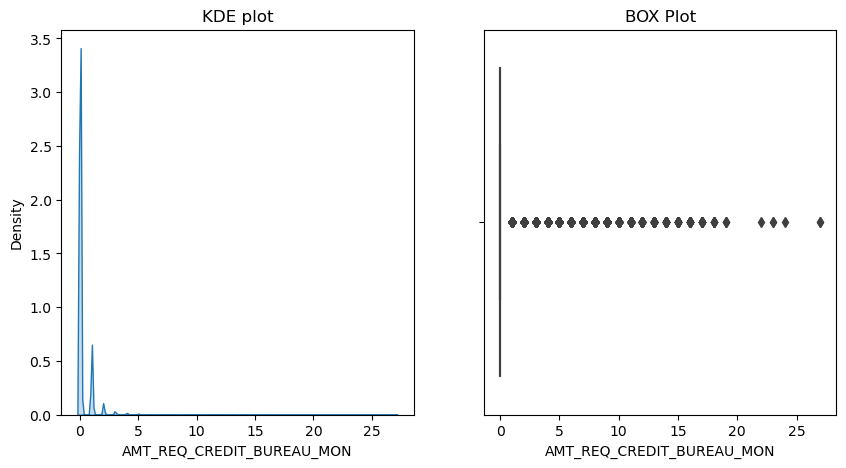

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


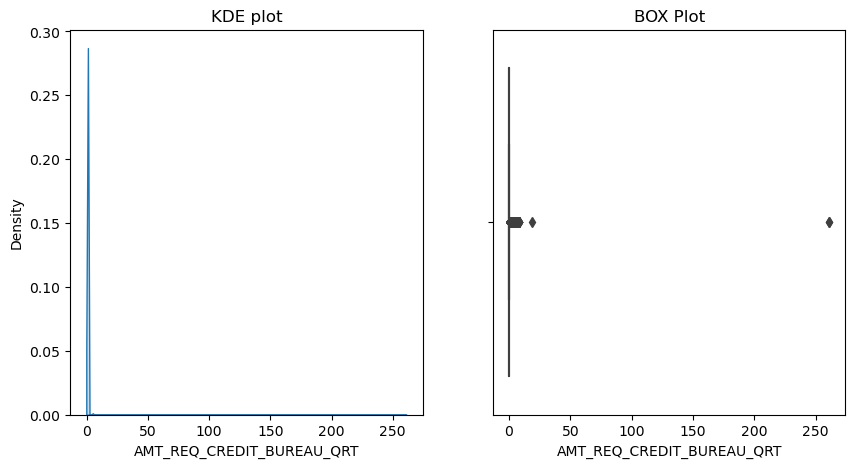

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


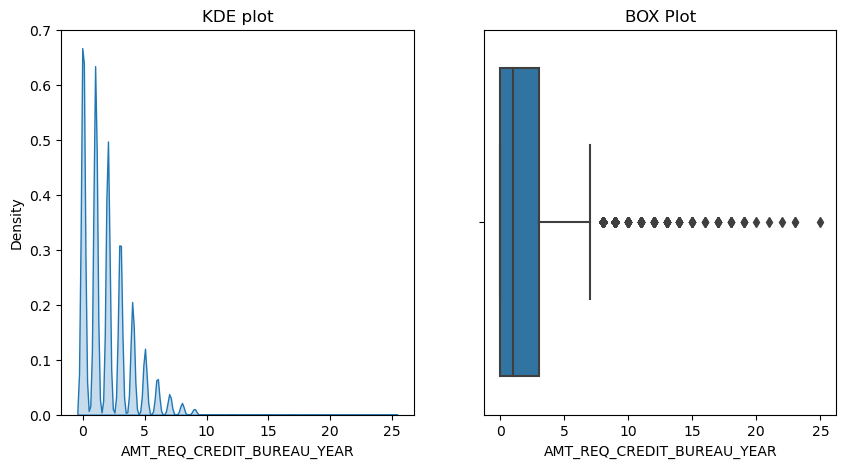

In [89]:
for col in num_columns:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(df[col], shade=True)
    plt.title('KDE plot')

    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title("BOX Plot")
    plt.show()

In [178]:
def outliers(df,col):
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    upper = df[col].quantile(0.75) + (1.5*iqr)
    lower = df[col].quantile(0.25) - (1.5*iqr)
    df[col] = df[col].clip(lower, upper)

In [179]:
for col in num_columns:
    outliers(df,col)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306199 entries, 0 to 307510
Data columns (total 69 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       306199 non-null  float64
 1   NAME_CONTRACT_TYPE           306199 non-null  object 
 2   CODE_GENDER                  306199 non-null  object 
 3   FLAG_OWN_CAR                 306199 non-null  object 
 4   FLAG_OWN_REALTY              306199 non-null  object 
 5   CNT_CHILDREN                 306199 non-null  float64
 6   AMT_INCOME_TOTAL             306199 non-null  float64
 7   AMT_CREDIT                   306199 non-null  float64
 8   AMT_ANNUITY                  306199 non-null  float64
 9   AMT_GOODS_PRICE              306199 non-null  float64
 10  NAME_TYPE_SUITE              306199 non-null  object 
 11  NAME_INCOME_TYPE             306199 non-null  object 
 12  NAME_EDUCATION_TYPE          306199 non-null  object 
 13 

# Correlation

In [181]:
cor = df.corr()
cor

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.000000,0.030724,0.002767,0.023885,-0.001387,-0.025075,0.343028,-0.173187,0.187798,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.037784
AMT_INCOME_TOTAL,NaN,0.030724,1.000000,0.410266,0.488646,0.413521,0.167654,0.078987,-0.172503,0.076435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047952
AMT_CREDIT,NaN,0.002767,0.410266,1.000000,0.791600,0.985593,0.088143,-0.056962,-0.110835,0.008413,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038723
AMT_ANNUITY,NaN,0.023885,0.488646,0.791600,1.000000,0.794219,0.104708,0.012987,-0.123650,0.040558,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007277
AMT_GOODS_PRICE,NaN,-0.001387,0.413521,0.985593,0.794219,1.000000,0.092403,-0.056394,-0.111200,0.009641,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.039845
REGION_POPULATION_RELATIVE,NaN,-0.025075,0.167654,0.088143,0.104708,0.092403,1.000000,-0.030041,-0.004610,-0.050058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002864
DAYS_BIRTH,NaN,0.343028,0.078987,-0.056962,0.012987,-0.056394,-0.030041,1.000000,-0.335924,0.332089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.060517
DAYS_EMPLOYED,NaN,-0.173187,-0.172503,-0.110835,-0.123650,-0.111200,-0.004610,-0.335924,1.000000,-0.089747,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.032243
DAYS_REGISTRATION,NaN,0.187798,0.076435,0.008413,0.040558,0.009641,-0.050058,0.332089,-0.089747,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.021424


In [182]:
# indexes with Nan
Nan_index = cor[cor.isna().sum() == 57].index
Nan_index

Index(['TARGET', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype=

In [183]:
df.drop(Nan_index,axis=1, inplace=True)

<AxesSubplot:>

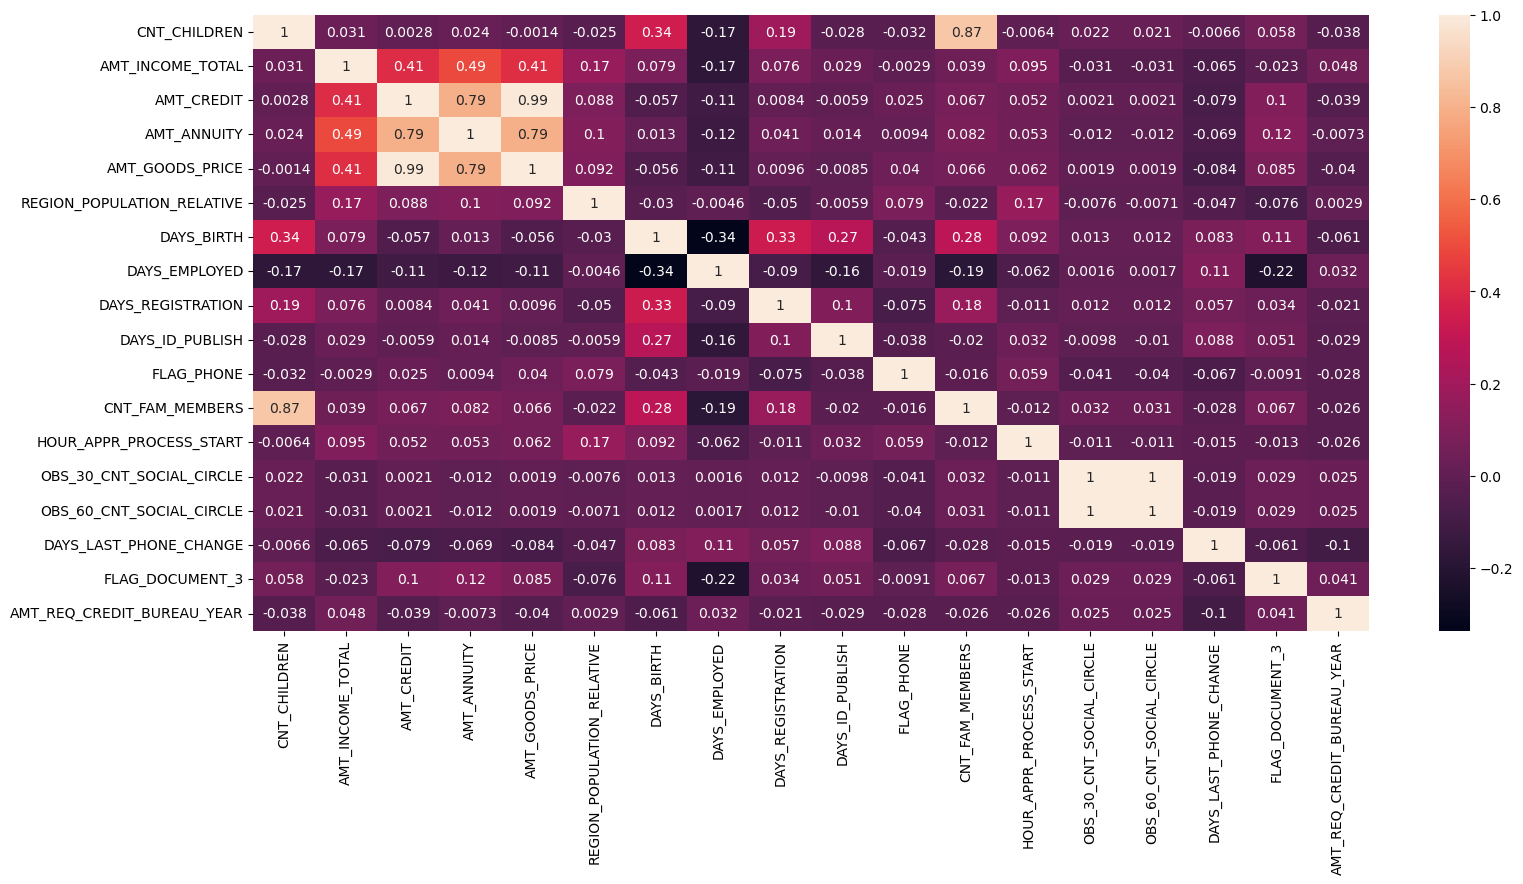

In [184]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

In [185]:
# columns with more than 80% correlation
# Drop them 
corr_cols = ['CNT_CHILDREN','AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE']

In [186]:
df.drop(corr_cols, axis=1, inplace=True)

In [187]:
df.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_PHONE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

<AxesSubplot:>

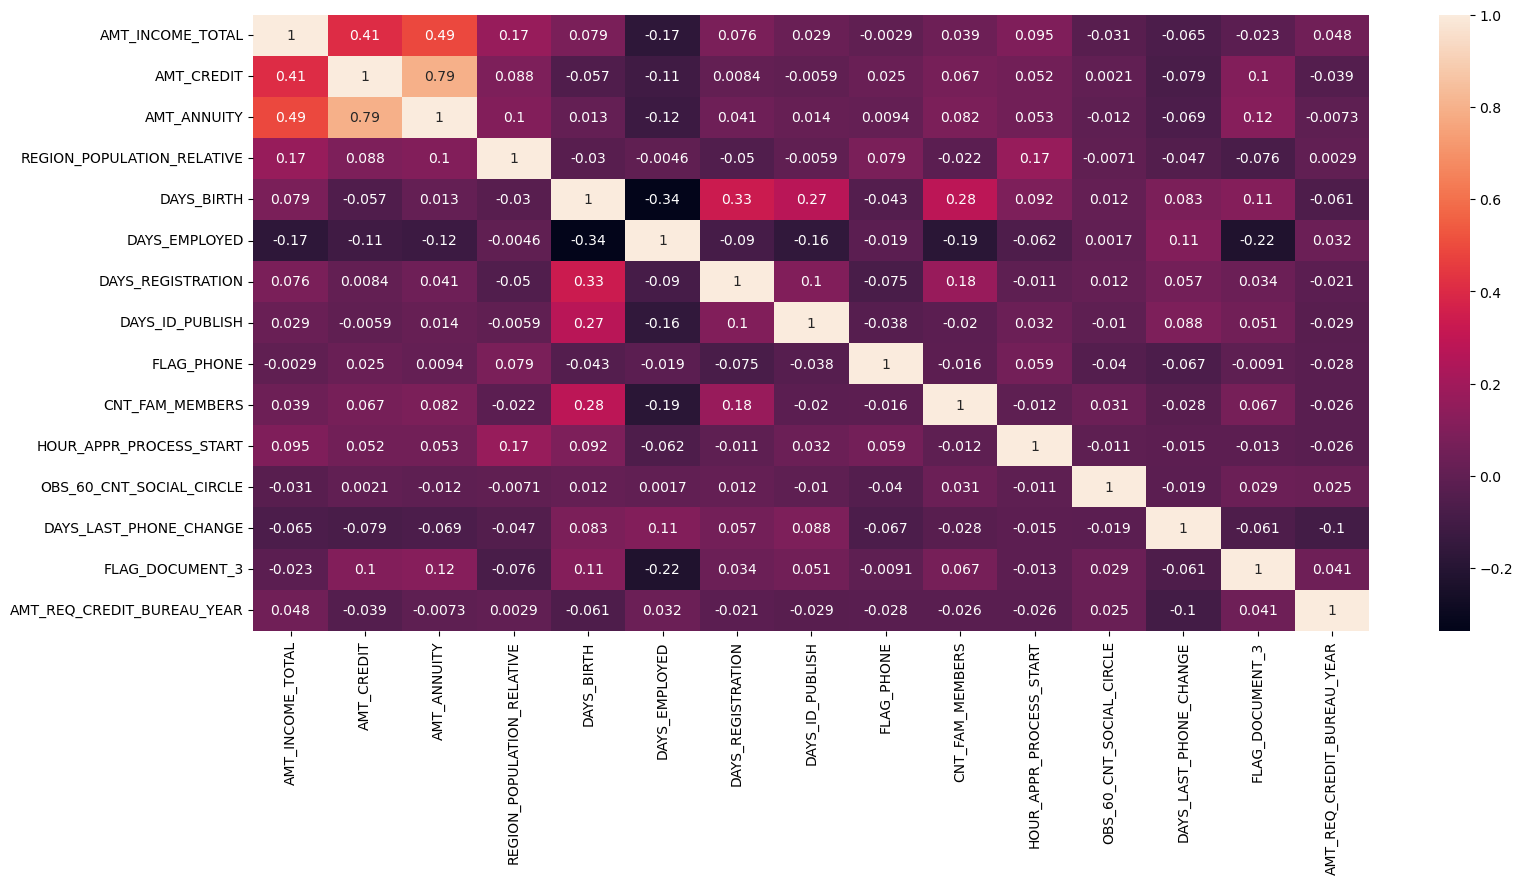

In [188]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(), annot=True)

# Encoding

In [189]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [190]:
ct = ColumnTransformer(transformers=[('ordinal', OrdinalEncoder(), obj_cols)], remainder='passthrough')
ct.set_output(transform='pandas')
df1 = ct.fit_transform(df)
df1

,ordinal__NAME_CONTRACT_TYPE,ordinal__CODE_GENDER,ordinal__FLAG_OWN_CAR,ordinal__FLAG_OWN_REALTY,ordinal__NAME_TYPE_SUITE,ordinal__NAME_INCOME_TYPE,ordinal__NAME_EDUCATION_TYPE,ordinal__NAME_FAMILY_STATUS,ordinal__NAME_HOUSING_TYPE,ordinal__OCCUPATION_TYPE,...,remainder__DAYS_EMPLOYED,remainder__DAYS_REGISTRATION,remainder__DAYS_ID_PUBLISH,remainder__FLAG_PHONE,remainder__CNT_FAM_MEMBERS,remainder__HOUR_APPR_PROCESS_START,remainder__OBS_60_CNT_SOCIAL_CIRCLE,remainder__DAYS_LAST_PHONE_CHANGE,remainder__FLAG_DOCUMENT_3,remainder__AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,-637.0,-3648.0,-2120,1,1.0,10.0,2.0,-1134.0,1,1.0
1,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,...,-1188.0,-1186.0,-291,1,2.0,11.0,1.0,-828.0,1,0.0
2,1.0,1.0,1.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,-225.0,-4260.0,-2531,1,1.0,9.0,0.0,-815.0,0,0.0
3,0.0,0.0,0.0,1.0,6.0,7.0,4.0,0.0,1.0,8.0,...,-3039.0,-9833.0,-2437,0,2.0,17.0,2.0,-617.0,1,1.0
4,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,3.0,...,-3038.0,-4311.0,-3458,0,1.0,11.0,0.0,-1106.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,0.0,6.0,7.0,4.0,2.0,5.0,14.0,...,-236.0,-8456.0,-1982,0,1.0,15.0,0.0,-273.0,0,6.0
307507,0.0,0.0,0.0,1.0,6.0,3.0,4.0,4.0,1.0,10.0,...,3417.5,-4388.0,-4090,1,1.0,8.0,0.0,0.0,1,1.0
307508,0.0,0.0,0.0,1.0,6.0,7.0,1.0,2.0,1.0,10.0,...,-6466.5,-6737.0,-5150,0,1.0,9.0,5.0,-1909.0,1,1.0
307509,0.0,0.0,0.0,1.0,6.0,1.0,4.0,1.0,1.0,8.0,...,-4786.0,-2562.0,-931,0,2.0,9.0,0.0,-322.0,1,0.0


In [191]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306199 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   ordinal__NAME_CONTRACT_TYPE            306199 non-null  float64
 1   ordinal__CODE_GENDER                   306199 non-null  float64
 2   ordinal__FLAG_OWN_CAR                  306199 non-null  float64
 3   ordinal__FLAG_OWN_REALTY               306199 non-null  float64
 4   ordinal__NAME_TYPE_SUITE               306199 non-null  float64
 5   ordinal__NAME_INCOME_TYPE              306199 non-null  float64
 6   ordinal__NAME_EDUCATION_TYPE           306199 non-null  float64
 7   ordinal__NAME_FAMILY_STATUS            306199 non-null  float64
 8   ordinal__NAME_HOUSING_TYPE             306199 non-null  float64
 9   ordinal__OCCUPATION_TYPE               306199 non-null  float64
 10  ordinal__WEEKDAY_APPR_PROCESS_START    306199 non-null  

In [192]:
x = df1

In [193]:
y.sum()

24768

In [194]:
x

,ordinal__NAME_CONTRACT_TYPE,ordinal__CODE_GENDER,ordinal__FLAG_OWN_CAR,ordinal__FLAG_OWN_REALTY,ordinal__NAME_TYPE_SUITE,ordinal__NAME_INCOME_TYPE,ordinal__NAME_EDUCATION_TYPE,ordinal__NAME_FAMILY_STATUS,ordinal__NAME_HOUSING_TYPE,ordinal__OCCUPATION_TYPE,...,remainder__DAYS_EMPLOYED,remainder__DAYS_REGISTRATION,remainder__DAYS_ID_PUBLISH,remainder__FLAG_PHONE,remainder__CNT_FAM_MEMBERS,remainder__HOUR_APPR_PROCESS_START,remainder__OBS_60_CNT_SOCIAL_CIRCLE,remainder__DAYS_LAST_PHONE_CHANGE,remainder__FLAG_DOCUMENT_3,remainder__AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,-637.0,-3648.0,-2120,1,1.0,10.0,2.0,-1134.0,1,1.0
1,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,1.0,3.0,...,-1188.0,-1186.0,-291,1,2.0,11.0,1.0,-828.0,1,0.0
2,1.0,1.0,1.0,1.0,6.0,7.0,4.0,3.0,1.0,8.0,...,-225.0,-4260.0,-2531,1,1.0,9.0,0.0,-815.0,0,0.0
3,0.0,0.0,0.0,1.0,6.0,7.0,4.0,0.0,1.0,8.0,...,-3039.0,-9833.0,-2437,0,2.0,17.0,2.0,-617.0,1,1.0
4,0.0,1.0,0.0,1.0,6.0,7.0,4.0,3.0,1.0,3.0,...,-3038.0,-4311.0,-3458,0,1.0,11.0,0.0,-1106.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0.0,1.0,0.0,0.0,6.0,7.0,4.0,2.0,5.0,14.0,...,-236.0,-8456.0,-1982,0,1.0,15.0,0.0,-273.0,0,6.0
307507,0.0,0.0,0.0,1.0,6.0,3.0,4.0,4.0,1.0,10.0,...,3417.5,-4388.0,-4090,1,1.0,8.0,0.0,0.0,1,1.0
307508,0.0,0.0,0.0,1.0,6.0,7.0,1.0,2.0,1.0,10.0,...,-6466.5,-6737.0,-5150,0,1.0,9.0,5.0,-1909.0,1,1.0
307509,0.0,0.0,0.0,1.0,6.0,1.0,4.0,1.0,1.0,8.0,...,-4786.0,-2562.0,-931,0,2.0,9.0,0.0,-322.0,1,0.0


In [195]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [196]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier()
rf.fit(x_train,y_train )

RandomForestClassifier()

accuracy_score 0.9187568038319182
precision_score 0.3333333333333333
recall_score 0.00013401232913428035
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84398
           1       0.33      0.00      0.00      7462

    accuracy                           0.92     91860
   macro avg       0.63      0.50      0.48     91860
weighted avg       0.87      0.92      0.88     91860



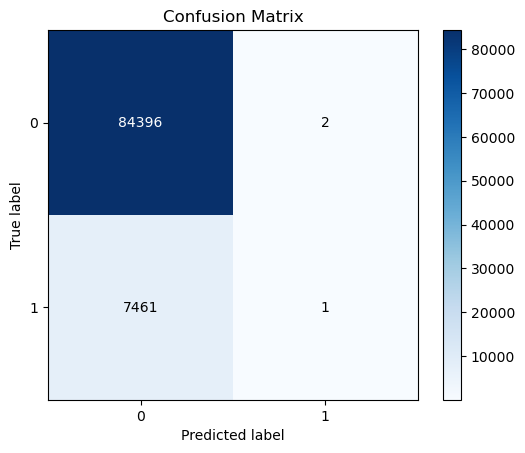

In [197]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

y_pred = rf.predict(x_test)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)


In [198]:
rf.feature_importances_

array([0.00273286, 0.00697093, 0.0085888 , 0.01048277, 0.01308414,
       0.00994801, 0.0107737 , 0.01996476, 0.0119206 , 0.03835089,
       0.0336585 , 0.04119187, 0.05431415, 0.06880496, 0.07393109,
       0.06080465, 0.08346205, 0.07053551, 0.08040201, 0.08167395,
       0.00947551, 0.02151951, 0.04807074, 0.02565706, 0.07225258,
       0.00652906, 0.03489933])

In [199]:
rf.feature_names_in_

array(['ordinal__NAME_CONTRACT_TYPE', 'ordinal__CODE_GENDER',
       'ordinal__FLAG_OWN_CAR', 'ordinal__FLAG_OWN_REALTY',
       'ordinal__NAME_TYPE_SUITE', 'ordinal__NAME_INCOME_TYPE',
       'ordinal__NAME_EDUCATION_TYPE', 'ordinal__NAME_FAMILY_STATUS',
       'ordinal__NAME_HOUSING_TYPE', 'ordinal__OCCUPATION_TYPE',
       'ordinal__WEEKDAY_APPR_PROCESS_START',
       'ordinal__ORGANIZATION_TYPE', 'remainder__AMT_INCOME_TOTAL',
       'remainder__AMT_CREDIT', 'remainder__AMT_ANNUITY',
       'remainder__REGION_POPULATION_RELATIVE', 'remainder__DAYS_BIRTH',
       'remainder__DAYS_EMPLOYED', 'remainder__DAYS_REGISTRATION',
       'remainder__DAYS_ID_PUBLISH', 'remainder__FLAG_PHONE',
       'remainder__CNT_FAM_MEMBERS', 'remainder__HOUR_APPR_PROCESS_START',
       'remainder__OBS_60_CNT_SOCIAL_CIRCLE',
       'remainder__DAYS_LAST_PHONE_CHANGE', 'remainder__FLAG_DOCUMENT_3',
       'remainder__AMT_REQ_CREDIT_BUREAU_YEAR'], dtype=object)

In [200]:
fe_imp = pd.DataFrame(rf.feature_importances_, index=rf.feature_names_in_, columns=['importance'])

In [201]:
fe_imp.sort_values('importance', ascending=False)

,importance
remainder__DAYS_BIRTH,0.083462
remainder__DAYS_ID_PUBLISH,0.081674
remainder__DAYS_REGISTRATION,0.080402
remainder__AMT_ANNUITY,0.073931
remainder__DAYS_LAST_PHONE_CHANGE,0.072253
remainder__DAYS_EMPLOYED,0.070536
remainder__AMT_CREDIT,0.068805
remainder__REGION_POPULATION_RELATIVE,0.060805
remainder__AMT_INCOME_TOTAL,0.054314
remainder__HOUR_APPR_PROCESS_START,0.048071
